### 1. Data Understanding

Installing Required Libraries for Optimization.

In [1]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.4 MB/s eta 0:00:00


Importing Libraries for Data Analysis and Visualization.

In [2]:
#Libary for Data Manipulation.
import numpy as np
import pandas as pd

#Library for Data Visualization.
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

#Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import sklearn

#Library to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")

Loading the Telecom Dataset.

In [3]:
df = pd.read_csv("TeleCom_Data-1.csv")
print(df)

       age          job  marital            education  default housing loan  \
0       40       admin.  married             basic.6y       no      no   no   
1       56     services  married          high.school       no      no  yes   
2       45     services  married             basic.9y  unknown      no   no   
3       59       admin.  married  professional.course       no      no   no   
4       41  blue-collar  married              unknown  unknown      no   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41175   29   unemployed   single             basic.4y       no     yes   no   
41176   73      retired  married  professional.course       no     yes   no   
41177   46  blue-collar  married  professional.course       no      no   no   
41178   56      retired  married    university.degree       no     yes   no   
41179   44   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  

Previewing Dataset Structure.

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41175,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41176,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41177,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41178,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41179,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [7]:
df.shape

(41180, 21)

In [8]:
df.select_dtypes(np.number)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41175,29,112,1,9,1,-1.1,94.767,-50.8,1.028,4963.6
41176,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41177,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41178,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [9]:
df.select_dtypes(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
2,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,no
3,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no
4,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41175,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,success,no
41176,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41177,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41178,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no


Checking for duplicate records on dataset.

In [10]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

True

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41168 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41168 non-null  int64  
 1   job             41168 non-null  object 
 2   marital         41168 non-null  object 
 3   education       41168 non-null  object 
 4   default         41168 non-null  object 
 5   housing         41168 non-null  object 
 6   loan            41168 non-null  object 
 7   contact         41168 non-null  object 
 8   month           41168 non-null  object 
 9   day_of_week     41168 non-null  object 
 10  duration        41168 non-null  int64  
 11  campaign        41168 non-null  int64  
 12  pdays           41168 non-null  int64  
 13  previous        41168 non-null  int64  
 14  poutcome        41168 non-null  object 
 15  emp.var.rate    41168 non-null  float64
 16  cons.price.idx  41168 non-null  float64
 17  cons.conf.idx   41168 non-null  floa

In [14]:
df.shape

(41168, 21)

### 2. Exploratory Data Analysis(EDA)

Checking for Missing Values.

In [15]:
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


Basic Descriptive Statistics

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41168.0,40.021449,10.419022,17.000,32.000,38.000,47.000,98.000
duration,41168.0,258.311237,259.325938,0.000,102.000,180.000,319.000,4918.000
campaign,41168.0,2.568087,2.770530,1.000,1.000,2.000,3.000,56.000
pdays,41168.0,962.506073,186.835214,0.000,999.000,999.000,999.000,999.000
previous,41168.0,0.172756,0.493782,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41168.0,0.081937,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41168.0,93.575563,0.578761,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41168.0,-40.502261,4.627020,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41168.0,3.621425,1.734375,0.634,1.344,4.857,4.961,5.045
nr.employed,41168.0,5167.052308,72.230165,4963.600,5099.100,5191.000,5228.100,5228.100


In [17]:
df.describe(include="O").T

,count,unique,top,freq
job,41168,12,admin.,10419
marital,41168,4,married,24914
education,41168,8,university.degree,12162
default,41168,3,no,32570
housing,41168,3,yes,21566
loan,41168,3,no,33931
contact,41168,2,cellular,26131
month,41168,10,may,13763
day_of_week,41168,5,thu,8617
poutcome,41168,3,nonexistent,35547


Exploring Numerical & Categorical Columns.

In [18]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("-"*127)

Unique values of  job {'entrepreneur', 'student', 'retired', 'management', 'unknown', 'blue-collar', 'admin.', 'housemaid', 'services', 'self-employed', 'unemployed', 'technician'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  marital {'single', 'unknown', 'divorced', 'married'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  education {'university.degree', 'basic.4y', 'professional.course', 'unknown', 'basic.6y', 'illiterate', 'basic.9y', 'high.school'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  default {'no', 'unknown', 'yes'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  housing {'no', 'un

In [19]:
for column in cat_cols:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for job:
job
admin.           10419
blue-collar       9252
technician        6738
services          3965
management        2923
retired           1716
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Value counts for marital:
marital
married     24914
single      11564
divorced     4610
unknown        80
Name: count, dtype: int64


Value counts for education:
education
university.degree      12162
high.school             9510
basic.9y                6044
professional.course     5238
basic.4y                4175
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


Value counts for default:
default
no         32570
unknown     8595
yes            3
Name: count, dtype: int64


Value counts for housing:
housing
yes        21566
no         18612
unknown      990
Name: count, dtype: int64


Value counts

Checking 'unknown' values count in Columns.

In [20]:
# List of columns to check for 'unknown' values
columns_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Count the occurrences of 'unknown' in each column
for col in columns_to_check:
    unknown_count = df[col].value_counts().get('unknown', 0)
    print(f"Column '{col}' has {unknown_count} 'unknown' values.")

Column 'job' has 330 'unknown' values.
Column 'marital' has 80 'unknown' values.
Column 'education' has 1730 'unknown' values.
Column 'default' has 8595 'unknown' values.
Column 'housing' has 990 'unknown' values.
Column 'loan' has 990 'unknown' values.


Handling of 'unknown' values in Columns.

In [21]:
# Columns where 'unknown' needs to be replaced with the mode
columns_to_impute = ['marital', 'housing', 'loan']

# Replace 'unknown' with the mode in each column
for col in columns_to_impute:
    mode_value = df[col].mode()[0]  # Calculate the mode
    df[col].replace('unknown', mode_value, inplace=True)

# Verify if 'unknown' has been replaced
for col in columns_to_impute:
    print(f"Unique values in {col} after imputation: {df[col].unique()}")

Unique values in marital after imputation: ['married' 'single' 'divorced']
Unique values in housing after imputation: ['no' 'yes']
Unique values in loan after imputation: ['no' 'yes']


Doing outliers detection using IQR method.


Analyzing outliers for age:
Outliers detected in age:
       age
27709   70
27753   76
27776   73
27796   88
27798   88
...    ...
40979   74
40982   84
40992   81
41000   80
41176   73

[467 rows x 1 columns]


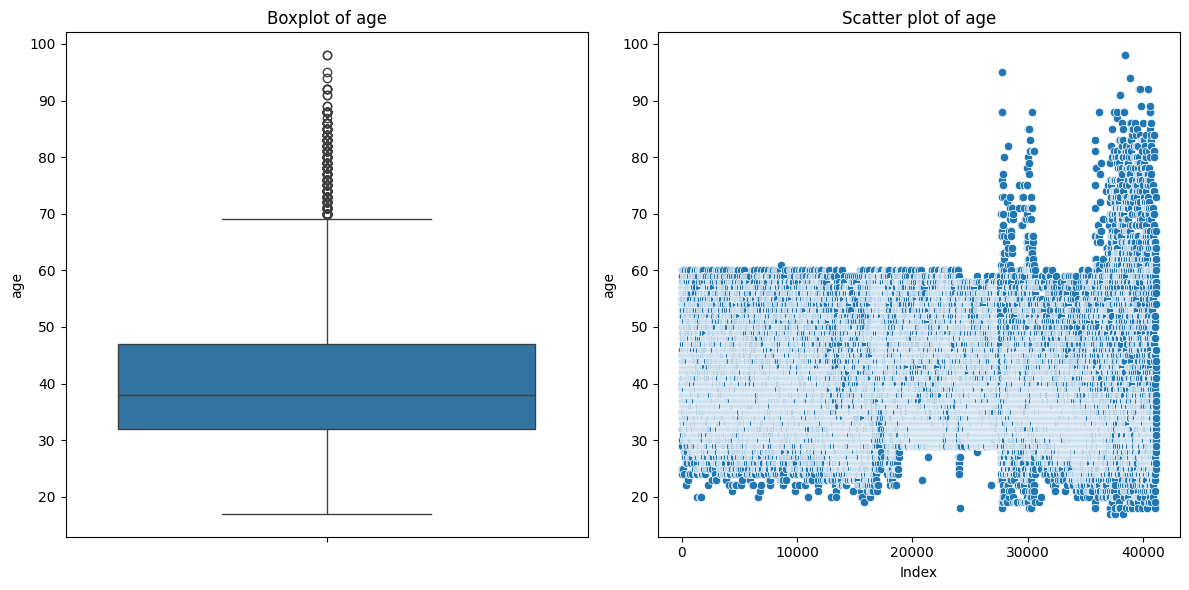


Analyzing outliers for duration:
Outliers detected in duration:
       duration
33         1666
53          787
57          812
71         1575
79         1042
...         ...
41143       712
41148       655
41155       843
41159      1868
41161       651

[2963 rows x 1 columns]


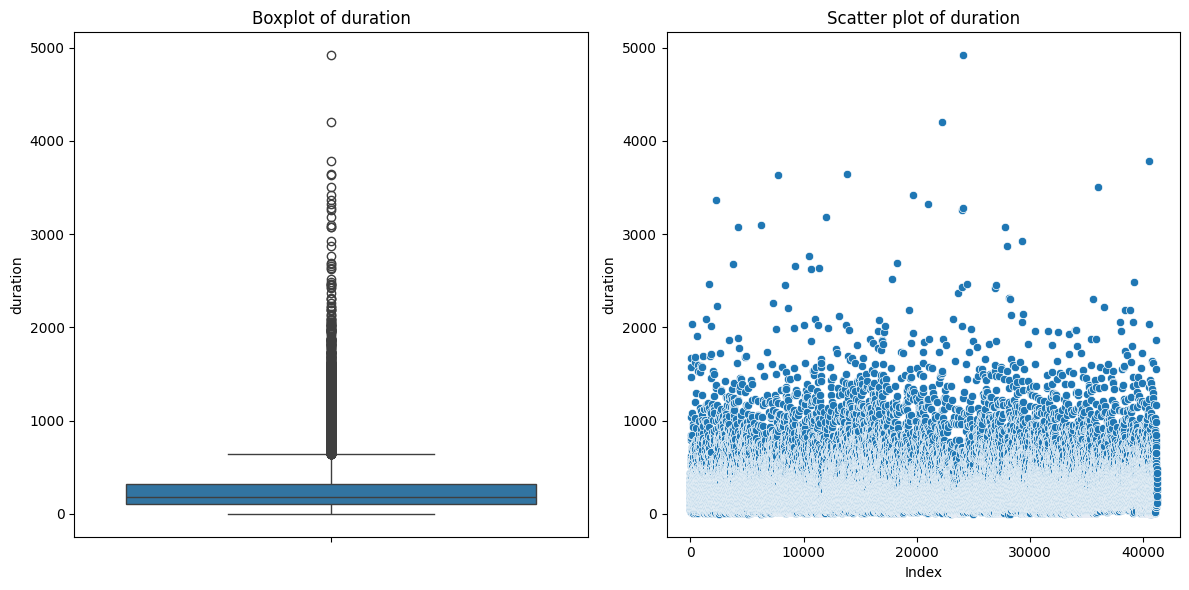


Analyzing outliers for campaign:
Outliers detected in campaign:
       campaign
883           7
1039          8
1090          8
1093          7
1226          7
...         ...
40607         9
40627         7
40694         7
40817         9
40989         7

[2406 rows x 1 columns]


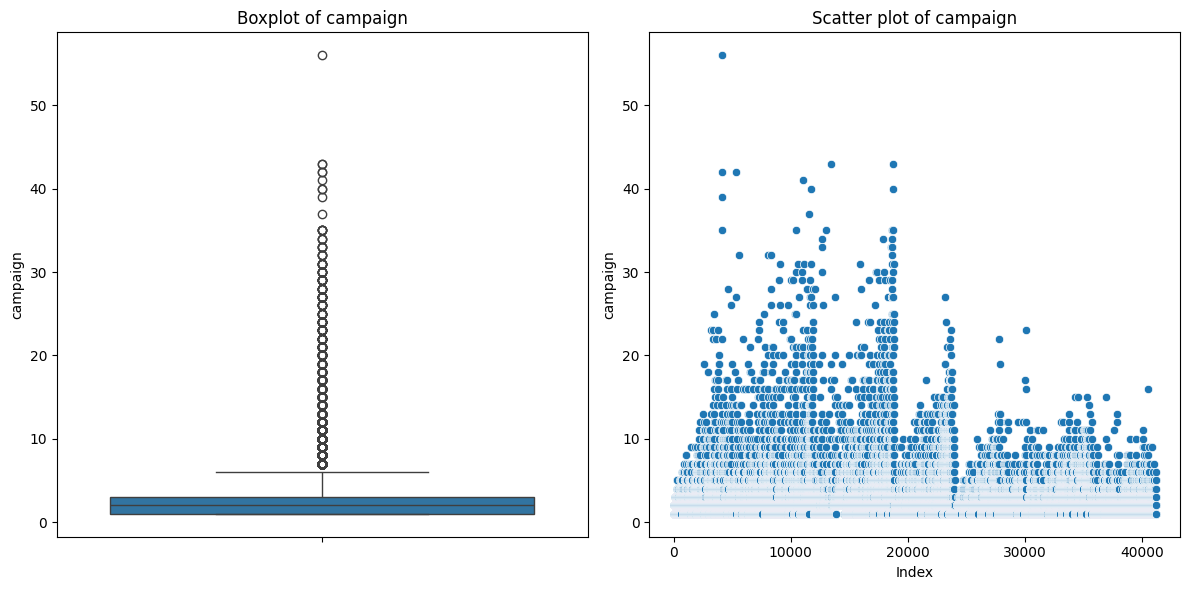


Analyzing outliers for pdays:
Outliers detected in pdays:
       pdays
24104      6
24260      4
24275      4
24393      3
24478      4
...      ...
41157      4
41158      4
41159     10
41171      6
41175      9

[1513 rows x 1 columns]


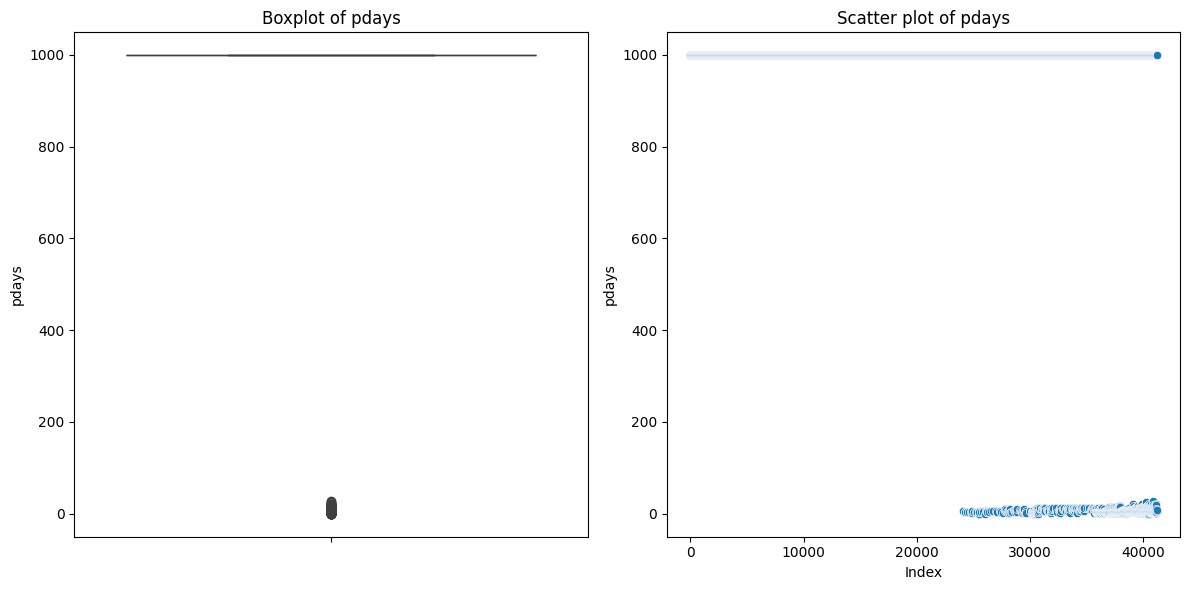


Analyzing outliers for previous:
Outliers detected in previous:
       previous
24009         1
24015         1
24072         1
24098         1
24104         1
...         ...
41161         1
41167         2
41168         2
41171         3
41175         1

[5621 rows x 1 columns]


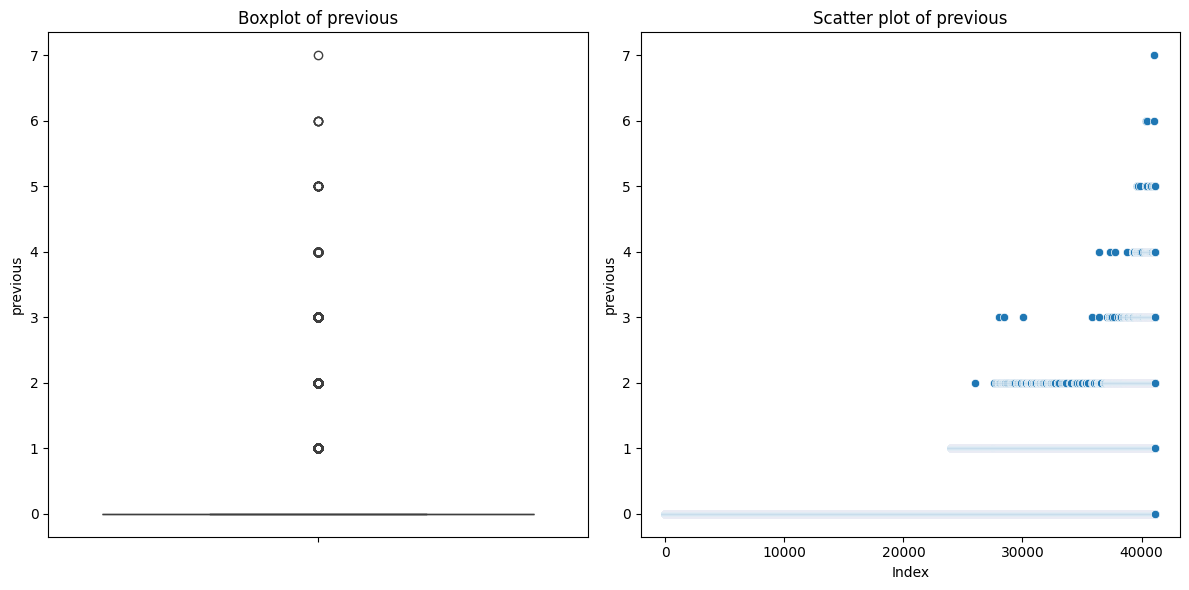


Analyzing outliers for emp.var.rate:
No outliers detected in emp.var.rate


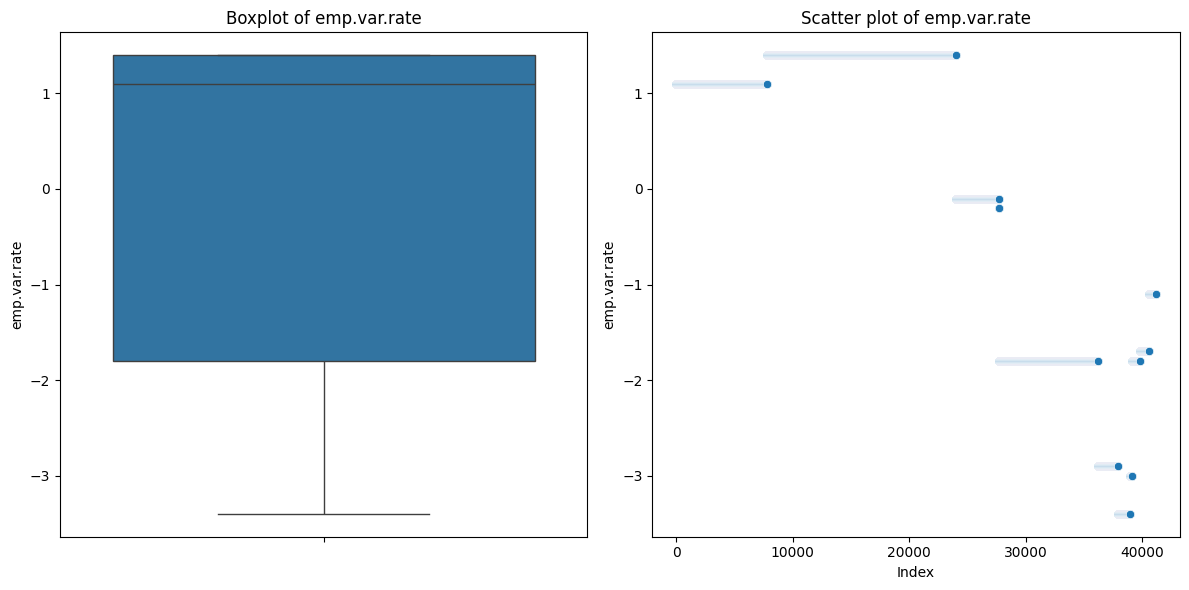


Analyzing outliers for cons.price.idx:
No outliers detected in cons.price.idx


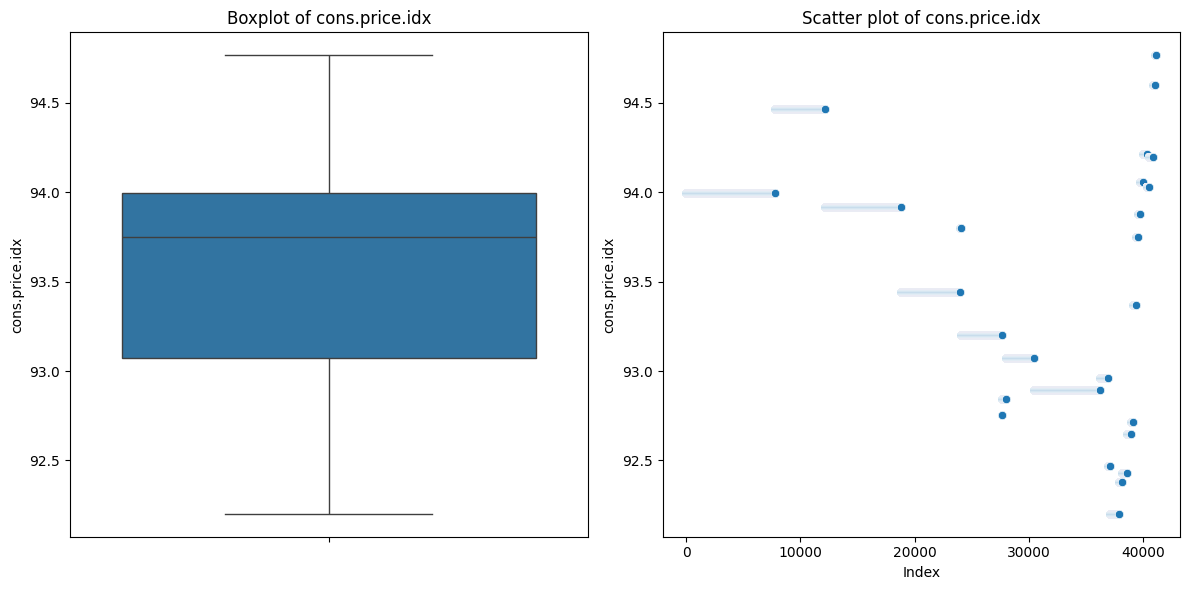


Analyzing outliers for cons.conf.idx:
Outliers detected in cons.conf.idx:
       cons.conf.idx
38150          -26.9
38151          -26.9
38152          -26.9
38153          -26.9
38154          -26.9
...              ...
38592          -26.9
38593          -26.9
38594          -26.9
38595          -26.9
38596          -26.9

[446 rows x 1 columns]


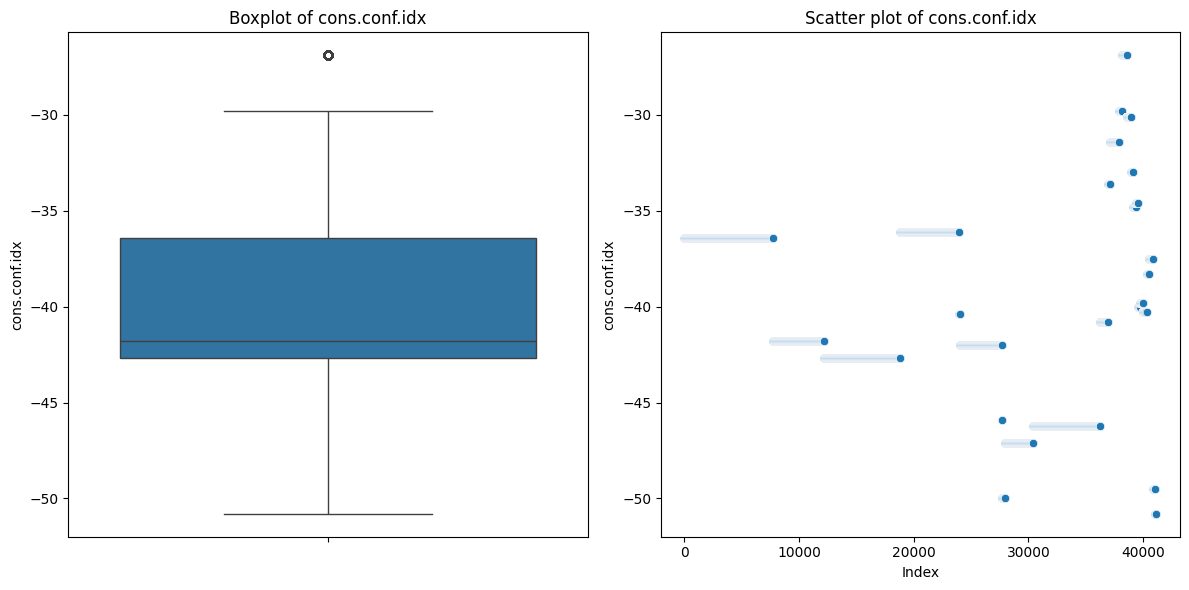


Analyzing outliers for euribor3m:
No outliers detected in euribor3m


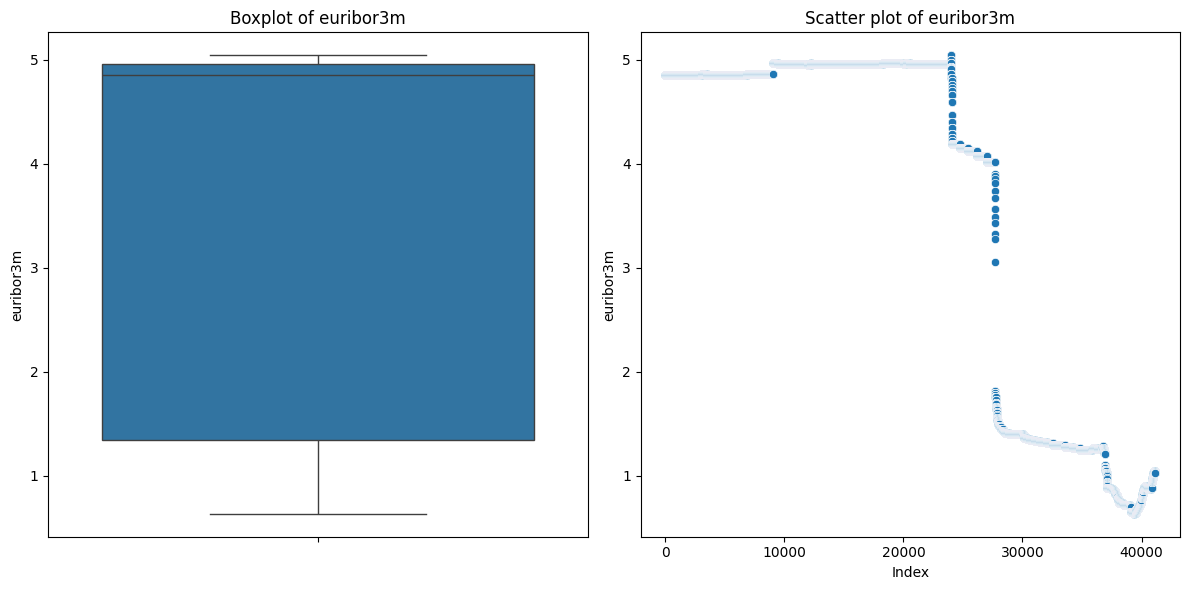


Analyzing outliers for nr.employed:
No outliers detected in nr.employed


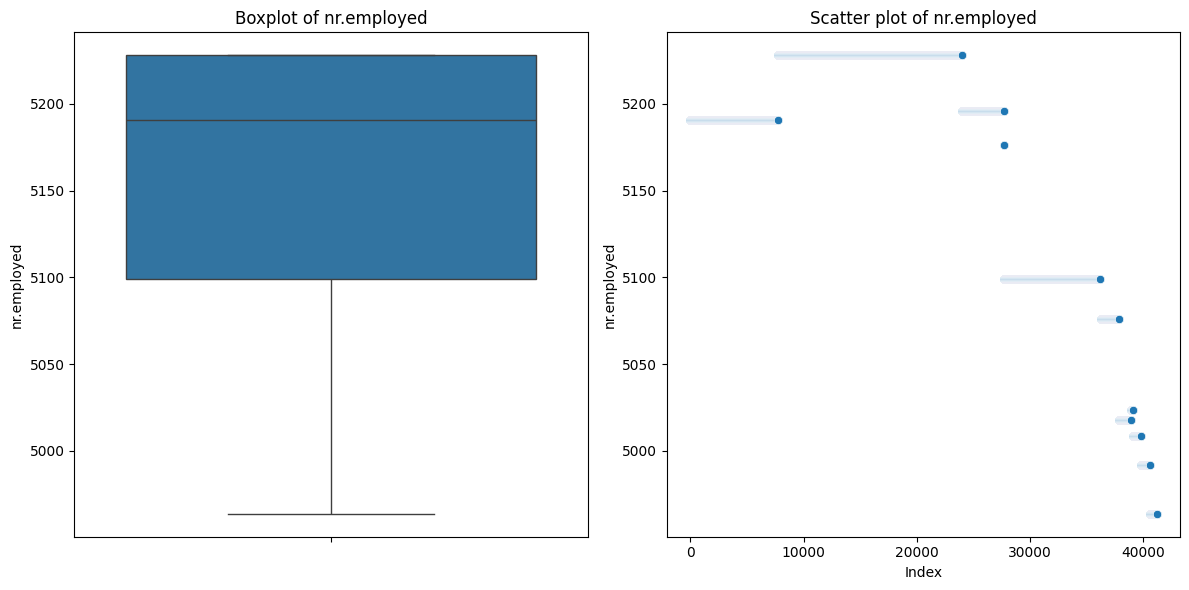

In [22]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to plot boxplot and scatter plot for outlier visualization
def plot_outliers(df, column):
    plt.figure(figsize=(12, 6))

    # Boxplot
    plt.subplot(121)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

    # Scatter plot
    plt.subplot(122)
    sns.scatterplot(x=range(len(df)), y=df[column])
    plt.title(f'Scatter plot of {column}')
    plt.xlabel('Index')

    plt.tight_layout()
    plt.show()

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Detect and visualize outliers for each numerical column
for column in numerical_columns:
    print(f"\nAnalyzing outliers for {column}:")

    # Detect outliers
    outliers = detect_outliers(df, column)

    if not outliers.empty:
        print(f"Outliers detected in {column}:")
        print(outliers[[column]])
    else:
        print(f"No outliers detected in {column}")

    # Visualize outliers
    plot_outliers(df, column)

Showing distribution check and relationship between response variable with other attributes.

Visualizing the subscribed user rate.

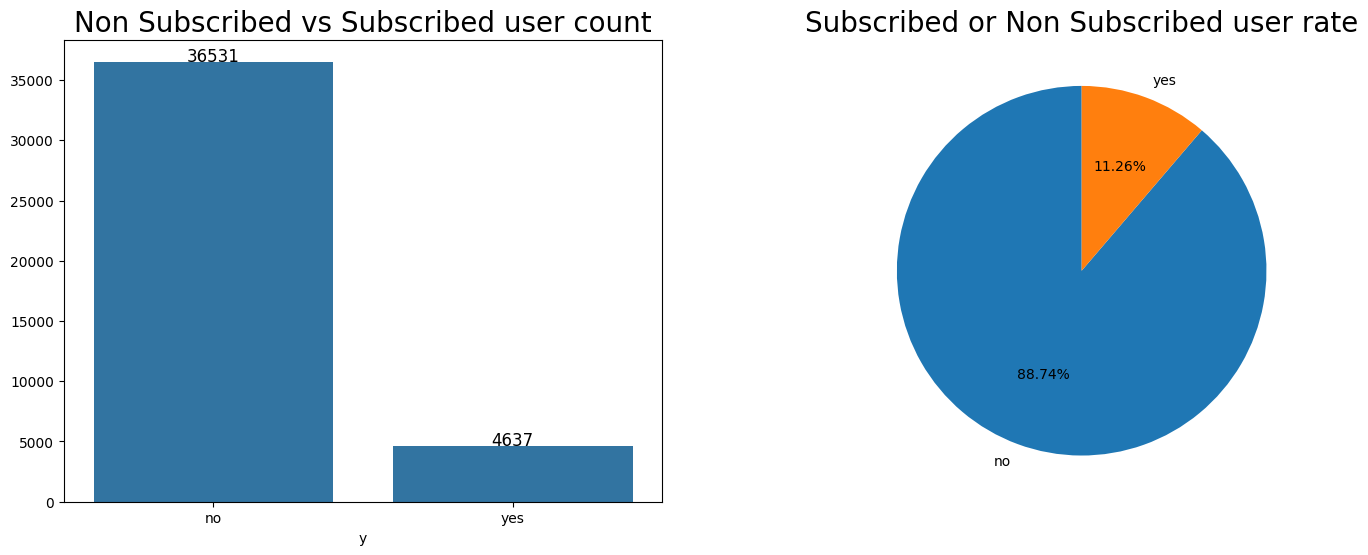

In [23]:
#Visualization to show subscribed user rate in Counts.

plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
subscribed_rate = df["y"].value_counts()
sns.barplot(x=subscribed_rate.index, y=subscribed_rate.values)
plt.title("Non Subscribed vs Subscribed user count", size=20)
for i in range(len(subscribed_rate)):
    plt.text(i, subscribed_rate[i], subscribed_rate[i], ha="center", fontsize=12)

# Visualization to show subscribed user rate in Percentage.
plt.subplot(1,2,2)
plt.pie(subscribed_rate, labels=["no", "yes"], autopct="%.2f%%", startangle=90)
plt.title("Subscribed or Non Subscribed user rate", size=20)

plt.show()

Analyzing subscribed user rate by age.

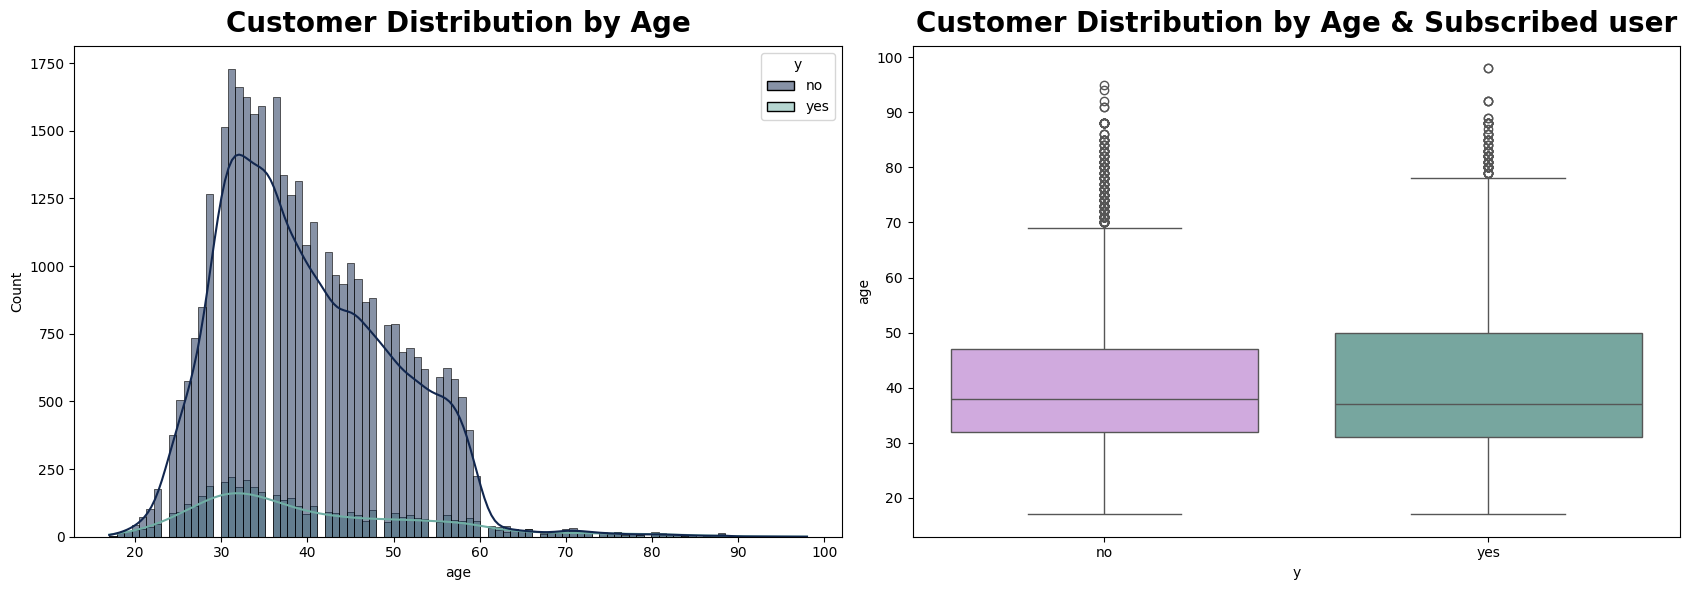

In [24]:
#Visualization to show Customer by Age.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.histplot(x="age",hue="y",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Customer Distribution by Age",fontweight="black",size=20,pad=10)

#Visualization to show Customer Distribution by Age & Subscribed User.
plt.subplot(1,2,2)
sns.boxplot(x="y",y="age",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Customer Distribution by Age & Subscribed user",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

Analyzing subscribed user rate by jobs.

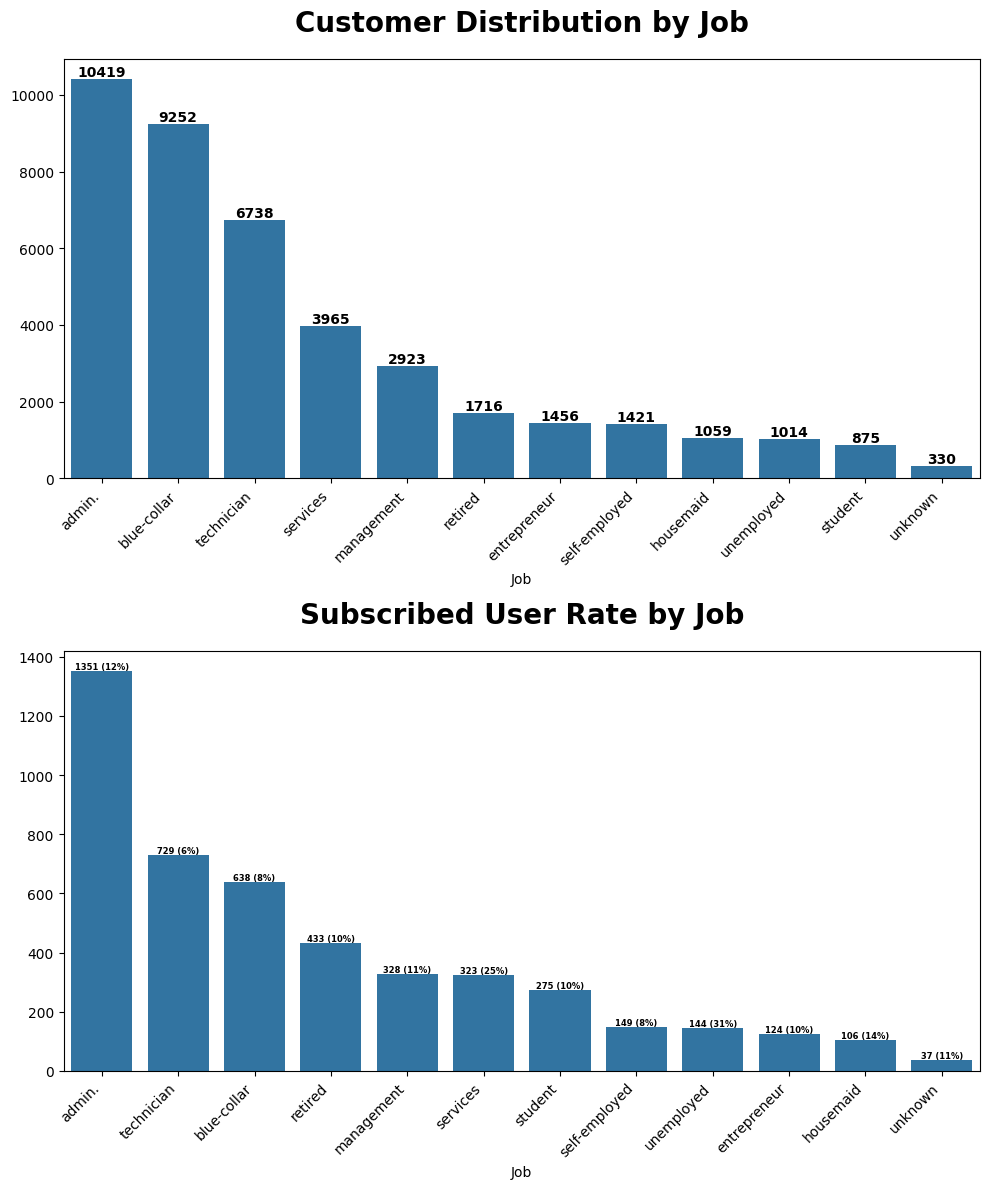

In [25]:
plt.figure(figsize=(10,12))

# Visualization to show Customer Distribution by Job (top plot)
plt.subplot(2, 1, 1)
value_1 = df["job"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values)
plt.title("Customer Distribution by Job", fontweight="black", size=20, pad=20)
plt.xlabel("Job")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=10)

# Visualization to show Subscribed User Rate by Job (bottom plot)
plt.subplot(2, 1, 2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["job"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values)
plt.title("Subscribed User Rate by Job", fontweight="black", size=20, pad=20)
plt.xlabel("Job")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=6)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate by martial status.

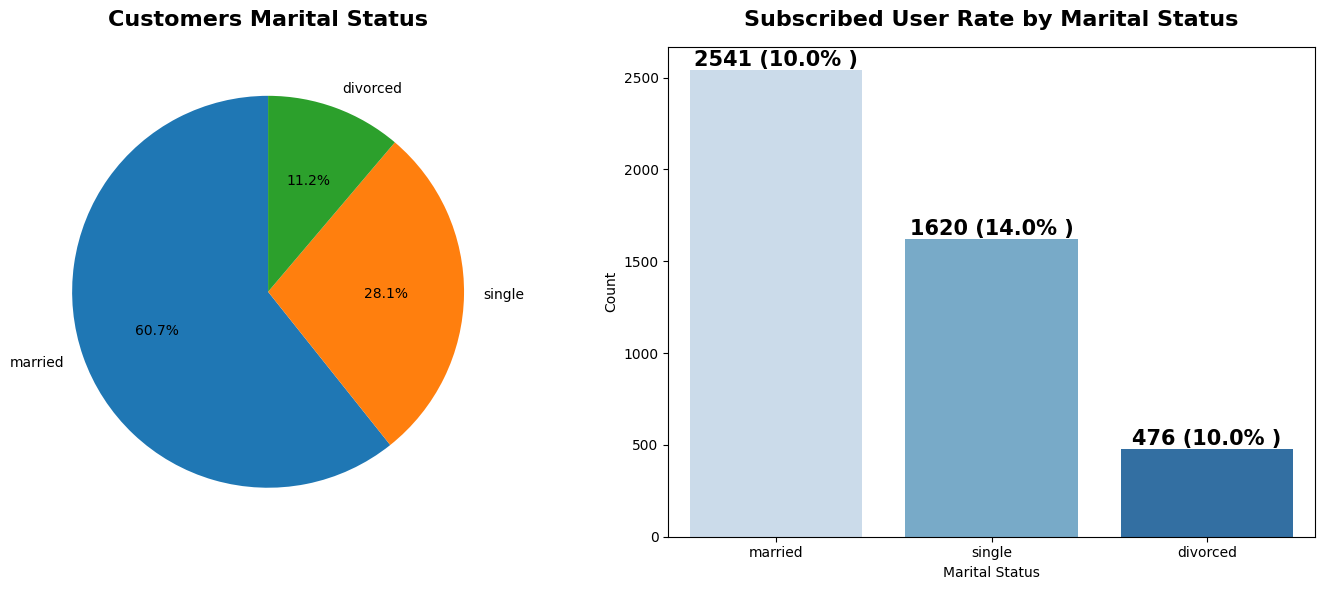

In [26]:
plt.figure(figsize=(14,6))

# Pie chart for Customer Marital Status distribution
plt.subplot(1,2,1)
value_1 = df["marital"].value_counts()
plt.title("Customers Marital Status", fontweight="bold", size=16, pad=15)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", startangle=90)

# Visualization to show Subscribed User Rate by Marital Status
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["marital"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values

sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette="Blues")
plt.title("Subscribed User Rate by Marital Status", fontweight="bold", size=16, pad=15)
plt.ylabel("Count")
plt.xlabel("Marital Status")
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(subscribed_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")


plt.tight_layout()
plt.show()

Analyzing subscribed user rate by education.

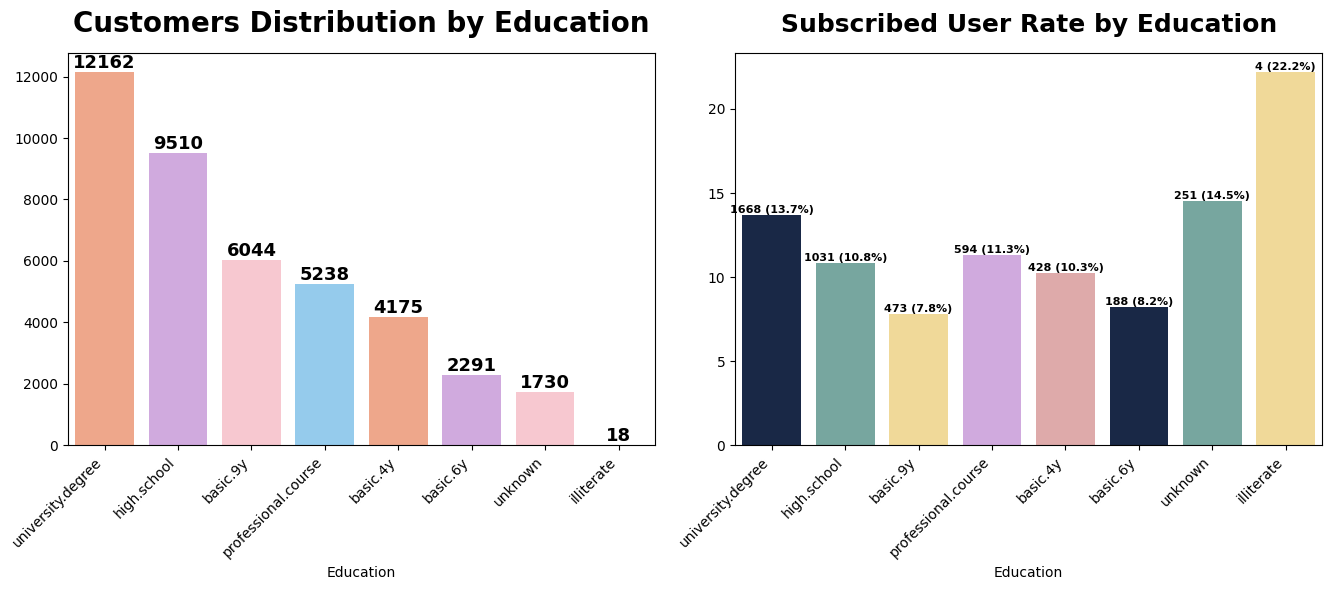

In [27]:
plt.figure(figsize=(13.5,6))

# Visualization to show Customers Distribution by Education
plt.subplot(1,2,1)
value_1 = df["education"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7", "#FFC0CB", "#87CEFA"])
plt.title("Customers Distribution by Education", fontweight="black", size=20, pad=15)
plt.xlabel("Education")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Education
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]

total_counts = df["education"].value_counts()
subscribed_counts = new_df["education"].value_counts()

subscribed_rate = (subscribed_counts / total_counts * 100).reindex(total_counts.index, fill_value=0)

subscribed_user_counts = subscribed_counts.reindex(total_counts.index, fill_value=0)

sns.barplot(x=subscribed_rate.index, y=subscribed_rate.values, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Subscribed User Rate by Education", fontweight="black", size=18, pad=15)
plt.xlabel("Education")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(subscribed_rate.values):
    count = subscribed_user_counts[index]
    plt.text(index, value, f"{count} ({value:.1f}%)", ha="center", va="bottom", fontweight="black", size=8)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate who has credit in default.

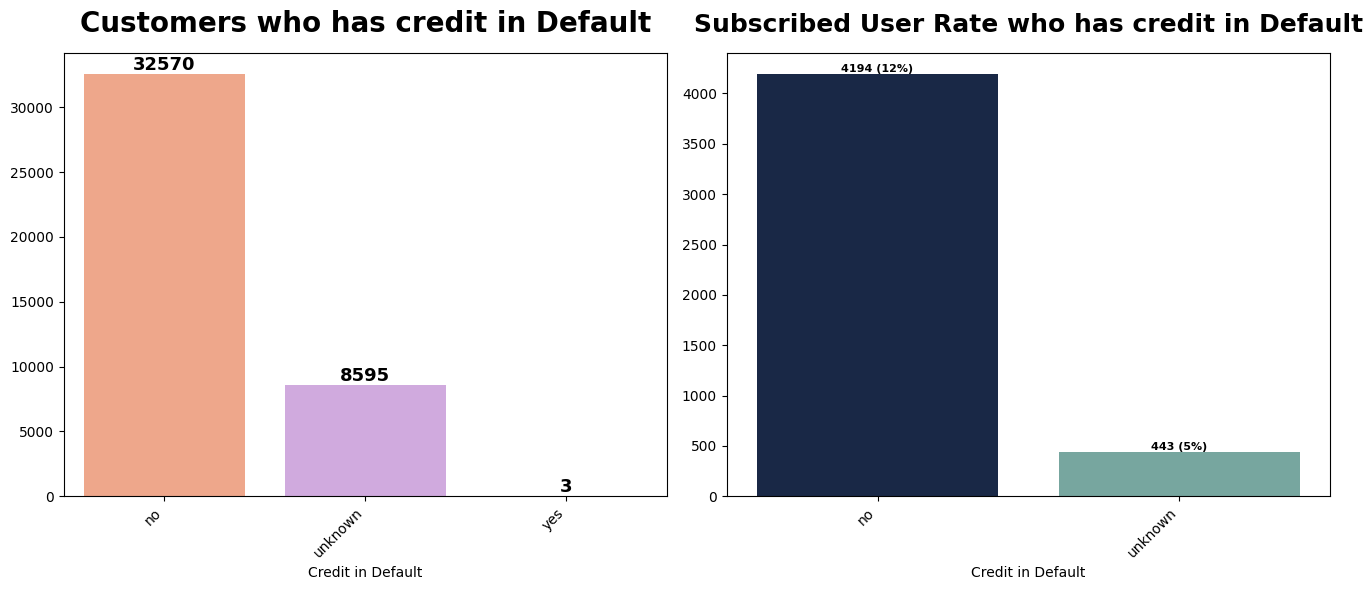

In [28]:
plt.figure(figsize=(13.5,6))

# Visualization to show Customers Distribution by Default.
plt.subplot(1,2,1)
value_1 = df["default"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7"])
plt.title("Customers who has credit in Default", fontweight="black", size=20, pad=15)
plt.xlabel("Credit in Default")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Default.
plt.subplot(1,2,2)
value_2 = new_df["default"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4"])
plt.title("Subscribed User Rate who has credit in Default", fontweight="black", size=18, pad=15)
plt.xlabel("Credit in Default")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=8)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate who has housing loan.

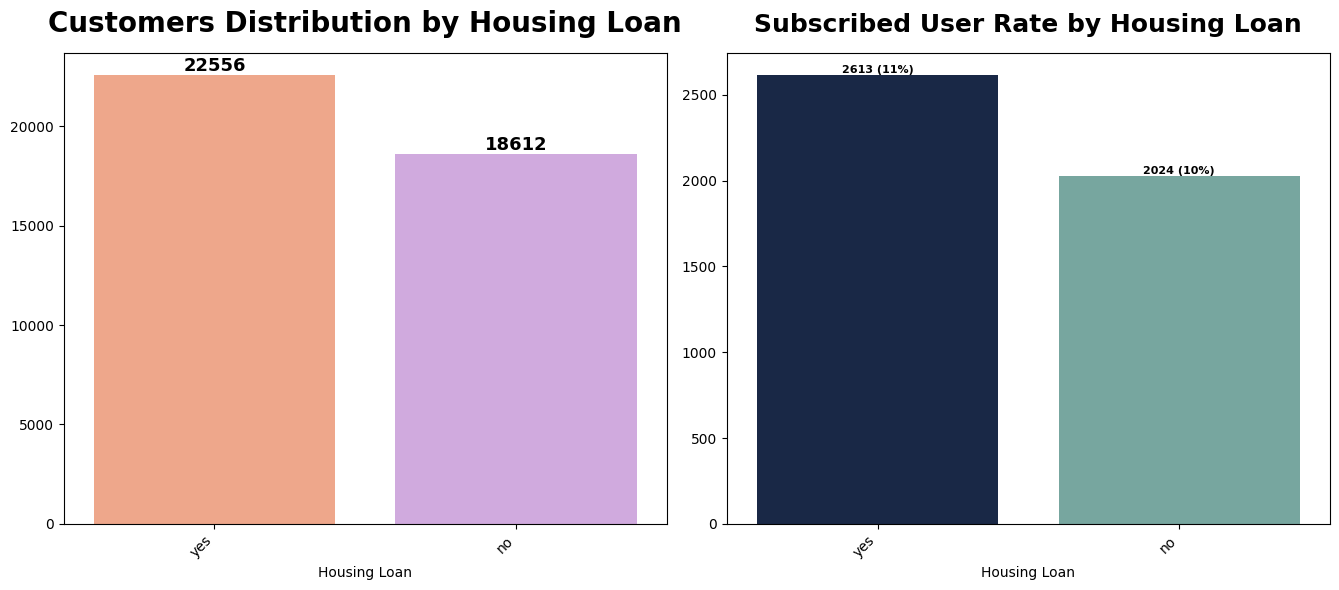

In [29]:
plt.figure(figsize=(13.5,6))

# Visualization to show Customer Distribution by Housing Loan
plt.subplot(1,2,1)
value_1 = df["housing"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7"])
plt.title("Customers Distribution by Housing Loan", fontweight="black", size=20, pad=15)
plt.xlabel("Housing Loan")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Housing Loan
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["housing"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4"])
plt.title("Subscribed User Rate by Housing Loan", fontweight="black", size=18, pad=15)
plt.xlabel("Housing Loan")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=8)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate who has personal loan.

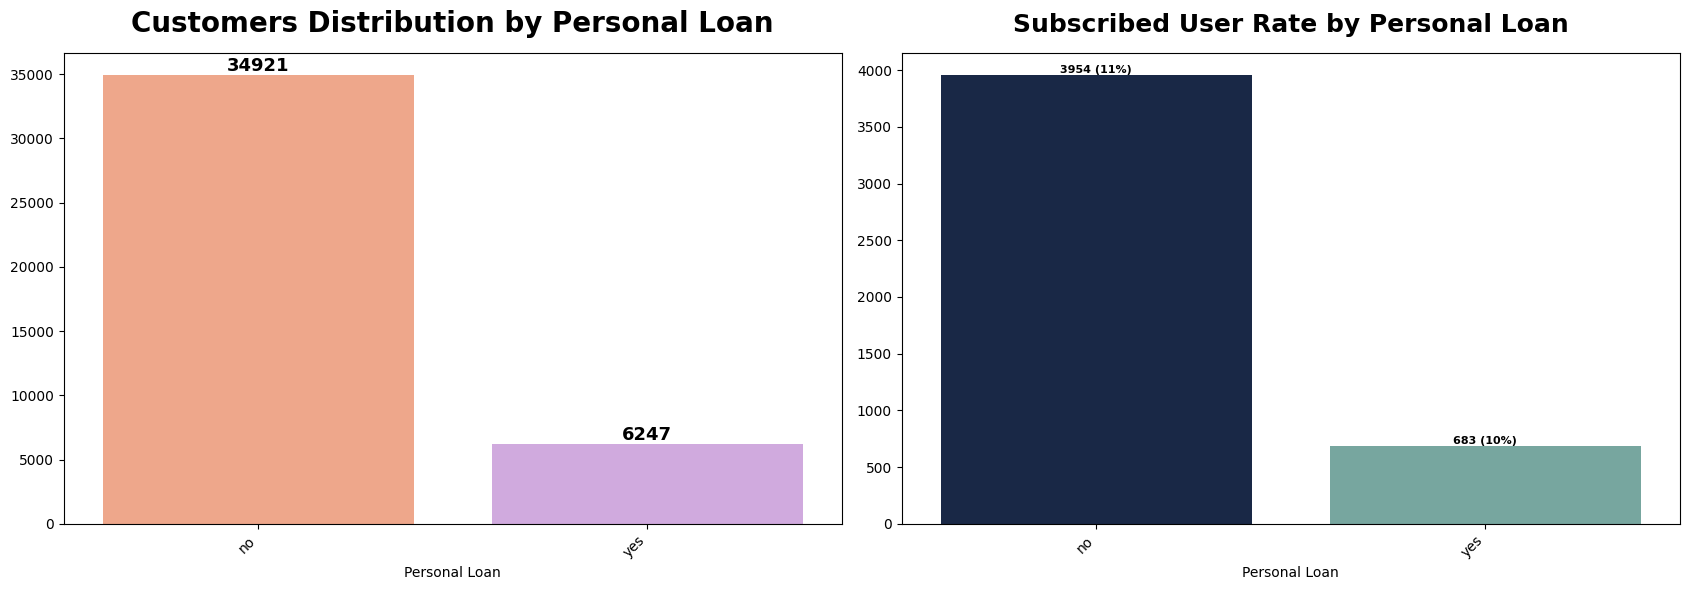

In [30]:
plt.figure(figsize=(17,6))

# Visualization to show Customer Distribution by Personal Loan
plt.subplot(1,2,1)
value_1 = df["loan"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7"])
plt.title("Customers Distribution by Personal Loan", fontweight="black", size=20, pad=15)
plt.xlabel("Personal Loan")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Personal Loan
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["loan"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4"])
plt.title("Subscribed User Rate by Personal Loan", fontweight="black", size=18, pad=15)
plt.xlabel("Personal Loan")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=8)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate by contact method.

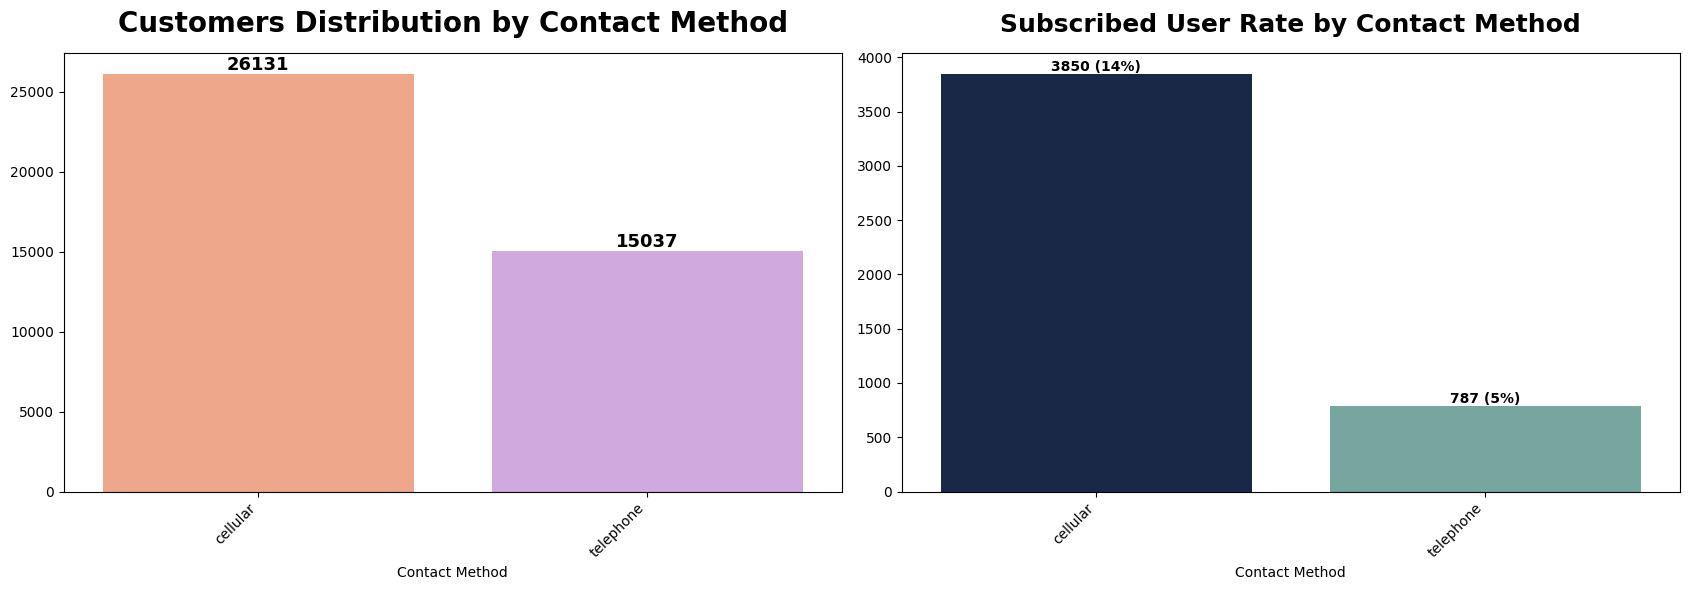

In [31]:
plt.figure(figsize=(17,6))

# Visualization to show Customer Distribution by Contact Method
plt.subplot(1,2,1)
value_1 = df["contact"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7"])
plt.title("Customers Distribution by Contact Method", fontweight="black", size=20, pad=15)
plt.xlabel("Contact Method")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Contact Method
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["contact"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4"])
plt.title("Subscribed User Rate by Contact Method", fontweight="black", size=18, pad=15)
plt.xlabel("Contact Method")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=10)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate by month of contact.

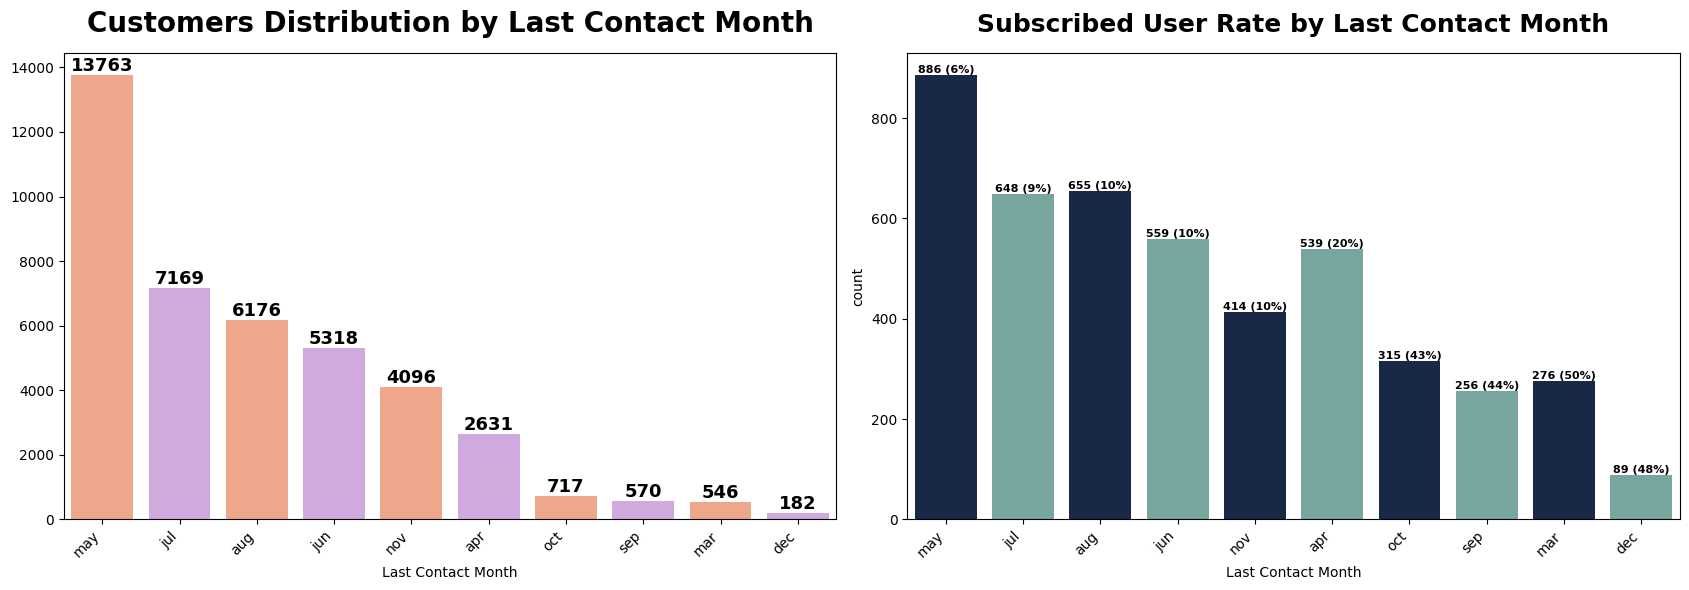

In [32]:
plt.figure(figsize=(17,6))

# Visualization to show Customer Distribution by Last Contact Month
plt.subplot(1,2,1)
value_1 = df["month"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7"])
plt.title("Customers Distribution by Last Contact Month", fontweight="black", size=20, pad=15)
plt.xlabel("Last Contact Month")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Last Contact Month
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["month"].value_counts()

subscribed_rate = np.zeros(len(value_1))
for i, month in enumerate(value_1.index):
    if month in value_2.index:
        subscribed_count = value_2[month]
    else:
        subscribed_count = 0
    total_count = value_1[month]
    subscribed_rate[i] = (subscribed_count / total_count) * 100

sns.barplot(x=value_1.index, y=value_2.reindex(value_1.index, fill_value=0), palette=["#11264e", "#6faea4"])
plt.title("Subscribed User Rate by Last Contact Month", fontweight="black", size=18, pad=15)
plt.xlabel("Last Contact Month")
plt.xticks(rotation=45, ha="right")

for index, month in enumerate(value_1.index):
    subscribed_count = value_2.get(month, 0)
    plt.text(index, subscribed_count, f"{subscribed_count} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=8)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate by day of contact.

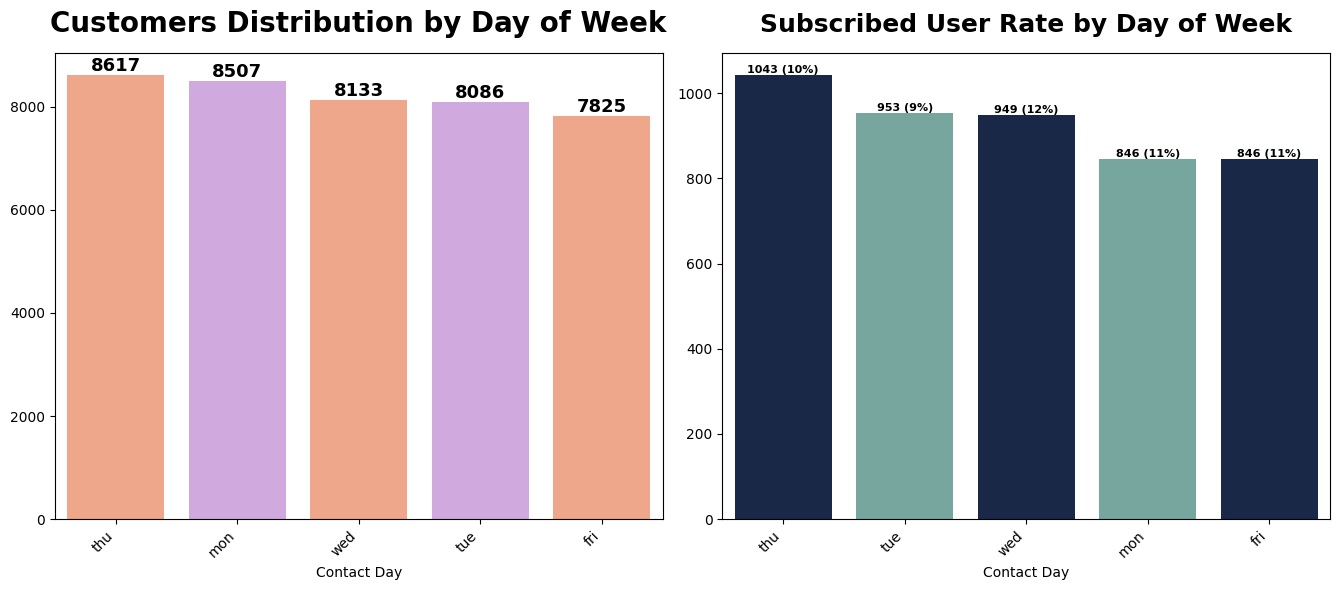

In [33]:
plt.figure(figsize=(13.5,6))

# Visualization to show Customer Distribution by Contact Day
plt.subplot(1,2,1)
value_1 = df["day_of_week"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7"])
plt.title("Customers Distribution by Day of Week", fontweight="black", size=20, pad=15)
plt.xlabel("Contact Day")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Contact Day
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["day_of_week"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4"])
plt.title("Subscribed User Rate by Day of Week", fontweight="black", size=18, pad=15)
plt.xlabel("Contact Day")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=8)

plt.tight_layout()
plt.show()

Analyzing subscribed user rate by call duration.

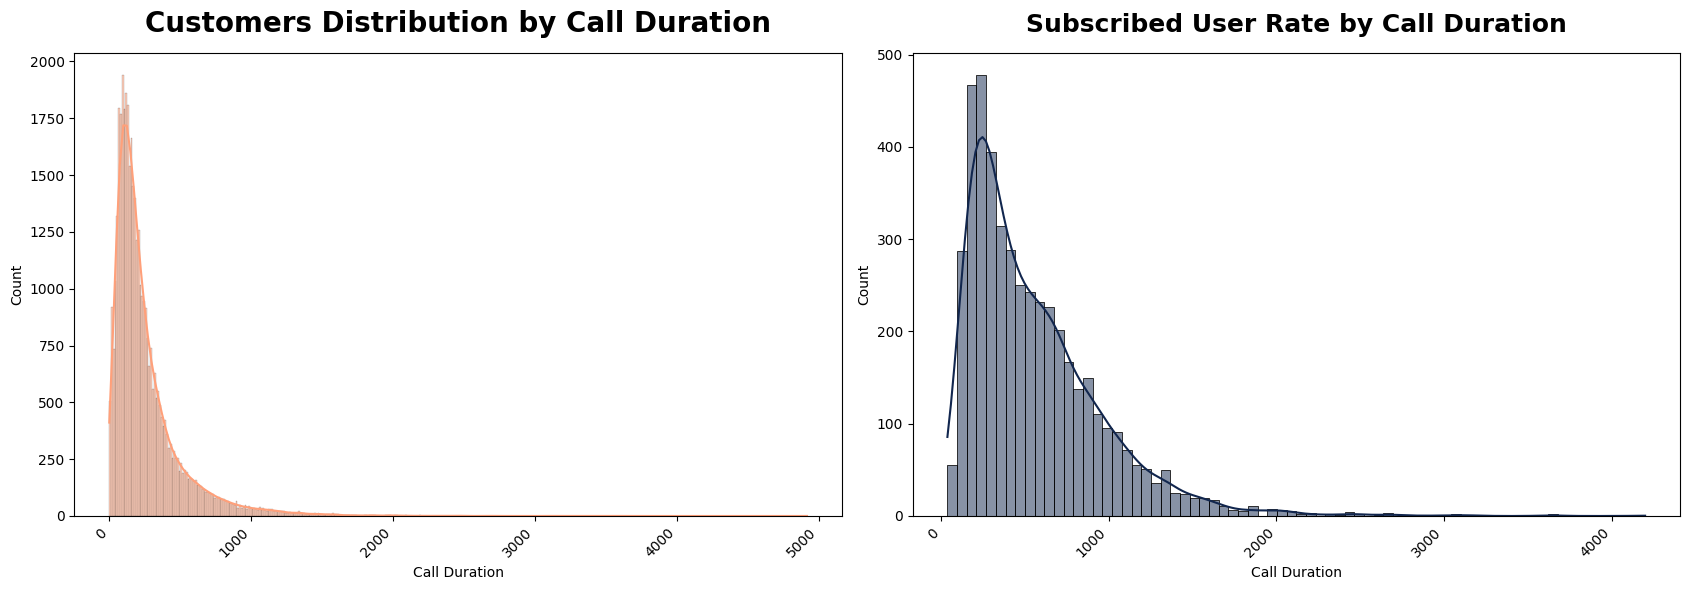

In [34]:
plt.figure(figsize=(17,6))

# Visualization to show Customer Distribution by Call Duration
plt.subplot(1,2,1)
sns.histplot(df["duration"], kde=True, color="#FFA07A")
plt.title("Customers Distribution by Call Duration", fontweight="black", size=20, pad=15)
plt.xlabel("Call Duration")
plt.xticks(rotation=45, ha="right")

# Visualization to show Subscribed User Rate by Call Duration
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
sns.histplot(new_df["duration"], kde=True, color="#11264e")
plt.title("Subscribed User Rate by Call Duration", fontweight="black", size=18, pad=15)
plt.xlabel("Call Duration")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

Analyzing subscribed user rate by Number of contacts performed before this campaign and for this client.

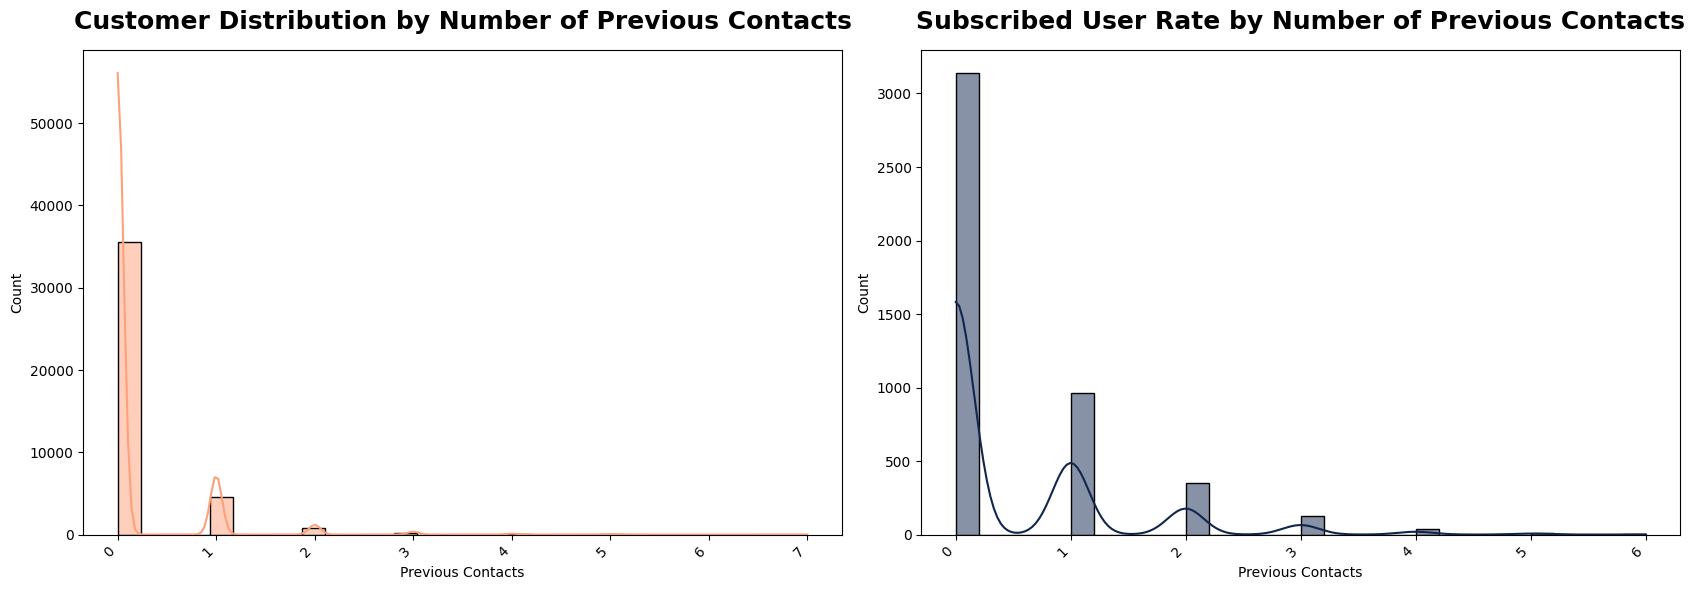

In [35]:
plt.figure(figsize=(17,6))

# Visualization to show Customer Distribution by Number of Previous Contacts
plt.subplot(1,2,1)
sns.histplot(df["previous"], kde=True, color="#FFA07A", bins=30)
plt.title("Customer Distribution by Number of Previous Contacts", fontweight="black", size=18, pad=15)
plt.xlabel("Previous Contacts")
plt.xticks(rotation=45, ha="right")

# Visualization to show Subscribed User Rate by Number of Previous Contacts
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
sns.histplot(new_df["previous"], kde=True, color="#11264e", bins=30)
plt.title("Subscribed User Rate by Number of Previous Contacts", fontweight="black", size=18, pad=15)
plt.xlabel("Previous Contacts")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

Analyzing subscribed user rate by Outcome of the previous marketing campaign.

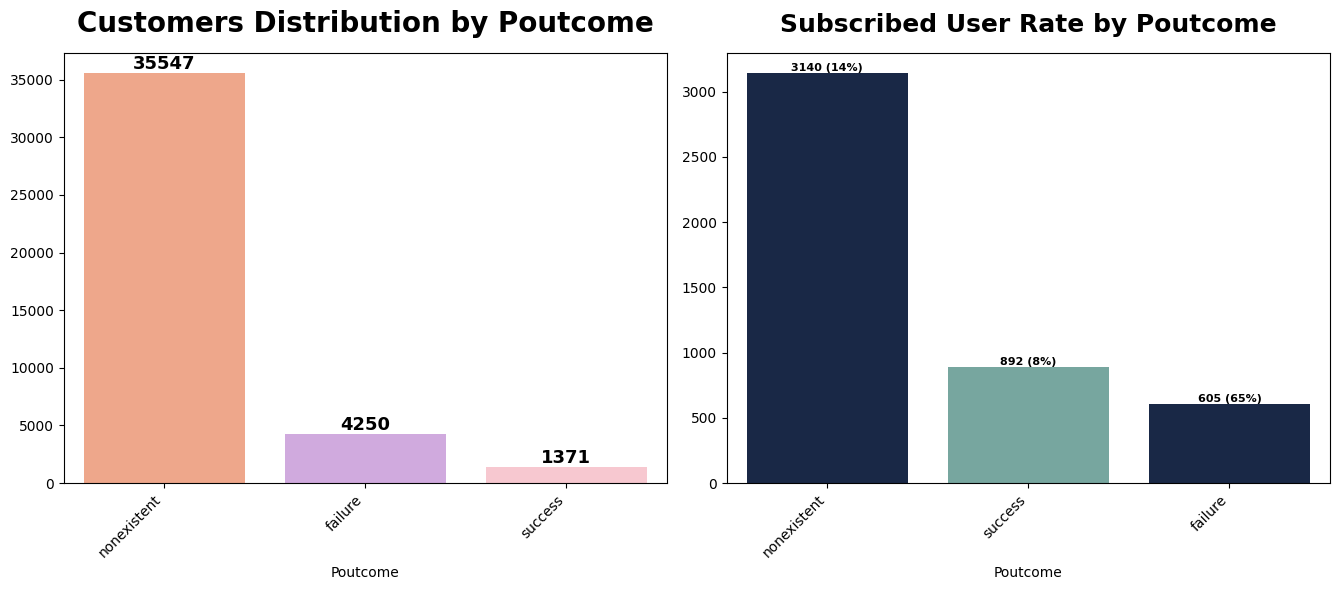

In [36]:
plt.figure(figsize=(13.5,6))

# Visualization to show Customer Distribution by Poutcome
plt.subplot(1,2,1)
value_1 = df["poutcome"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7", "#FFC0CB", "#87CEFA"])
plt.title("Customers Distribution by Poutcome", fontweight="black", size=20, pad=15)
plt.xlabel("Poutcome")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=13)

# Visualization to show Subscribed User Rate by Poutcome
plt.subplot(1,2,2)
new_df = df[df["y"] == "yes"]
value_2 = new_df["poutcome"].value_counts()
subscribed_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4"])
plt.title("Subscribed User Rate by Poutcome", fontweight="black", size=18, pad=15)
plt.xlabel("Poutcome")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({int(subscribed_rate[index])}%)", ha="center", va="bottom", fontweight="black", size=8)

plt.tight_layout()
plt.show()

Analyzing Age Distribution (21-40) for Admins who is Subscribed User.

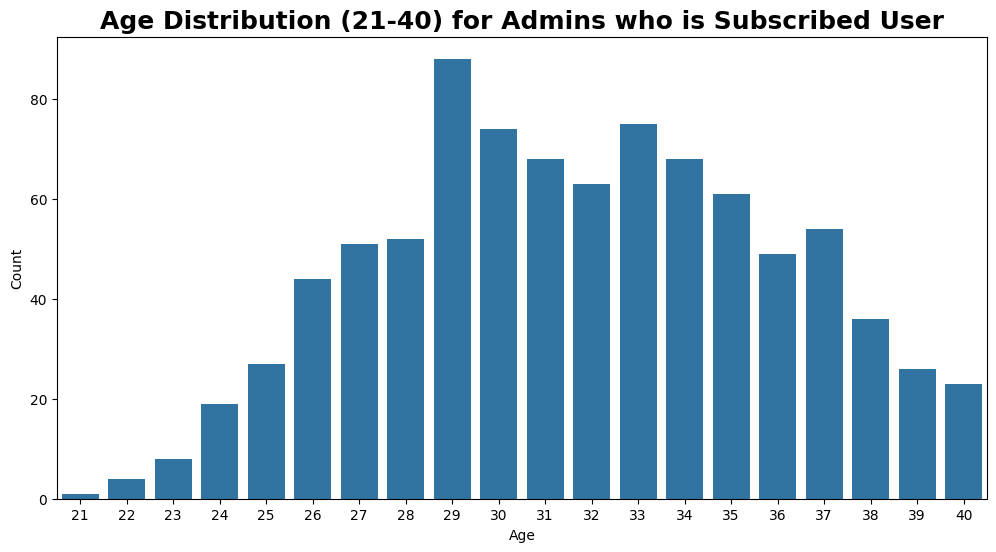

In [37]:
filtered_df = df[(df['age'] >= 20) & (df['age'] <= 40) & (df['job'] == 'admin.') & (df['y'] == 'yes')]
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=filtered_df)
plt.title("Age Distribution (21-40) for Admins who is Subscribed User", fontweight="black", size=18)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### 3. Data Preparation

In [38]:
df_cleaned = df.copy()

Encoding target column.

In [39]:
# Encode target column 'y' to binary format
df_cleaned['y'] = df_cleaned['y'].map({'yes': 1, 'no': 0})

# Check the distribution of the encoded target variable
print(df_cleaned['y'].value_counts())

y
0    36531
1     4637
Name: count, dtype: int64


Printing Monthly Distribution of Observations.

In [40]:
month_summary = df_cleaned['month'].value_counts().reset_index()
month_summary.columns = ['Month', 'Number of Observations']
month_summary['Percentage'] = (month_summary['Number of Observations'] / len(df_cleaned)) * 100

# Display the summary
print(month_summary)

  Month  Number of Observations  Percentage
0   may                   13763   33.431306
1   jul                    7169   17.414011
2   aug                    6176   15.001943
3   jun                    5318   12.917800
4   nov                    4096    9.949475
5   apr                    2631    6.390886
6   oct                     717    1.741644
7   sep                     570    1.384571
8   mar                     546    1.326273
9   dec                     182    0.442091


Creating new features 'duration_category', 'age_segment' and 'total_contacted'.

In [41]:
# Define bins and labels
bin_edges = [-float('inf'), 0, 60, 300, 900, float('inf')]
bin_labels = ['no_call', 'short', 'medium', 'long', 'very_long']

df_cleaned['duration_category'] = pd.cut(df_cleaned['duration'], bins=bin_edges, labels=bin_labels, right=True)

# Check for NaN values in the binned column
print("NaN values in 'duration_category;:", df_cleaned['duration_category'].isna().sum())

# Verify the result
print(df_cleaned['duration_category'].value_counts())

NaN values in 'duration_category;: 0
duration_category
medium       25684
long          9919
short         4280
very_long     1281
no_call          4
Name: count, dtype: int64


In [42]:
bin_edges=[16, 25, 35, 50, 65, 100]
bin_labels=['Youth', 'Young Adults', 'Middle-Aged', 'Senior', 'Elderly']

df_cleaned['age_segment'] = pd.cut(df_cleaned['age'], bins=bin_edges, labels=bin_labels, right=True)

segment_analysis = df_cleaned.groupby(['age_segment', 'job'])['y'].mean().reset_index()
segment_analysis['y'] = (segment_analysis['y'] * 100).round(1).astype(str) + '%'
print(segment_analysis)

     age_segment            job      y
0          Youth         admin.  18.7%
1          Youth    blue-collar   9.2%
2          Youth   entrepreneur   5.0%
3          Youth      housemaid   0.0%
4          Youth     management  15.8%
5          Youth        retired   0.0%
6          Youth  self-employed  20.0%
7          Youth       services  14.3%
8          Youth        student  36.6%
9          Youth     technician  16.4%
10         Youth     unemployed  28.6%
11         Youth        unknown  75.0%
12  Young Adults         admin.  14.0%
13  Young Adults    blue-collar   7.9%
14  Young Adults   entrepreneur   9.2%
15  Young Adults      housemaid   7.1%
16  Young Adults     management  11.1%
17  Young Adults        retired   7.7%
18  Young Adults  self-employed  11.5%
19  Young Adults       services   8.9%
20  Young Adults        student  27.2%
21  Young Adults     technician  12.1%
22  Young Adults     unemployed  15.5%
23  Young Adults        unknown  10.0%
24   Middle-Aged         

In [43]:
df_cleaned['total_contacted'] = df_cleaned['previous'] + df_cleaned['campaign']

Encoding Categorical Columns.

In [44]:
# Label Encoding for binary or "unknown" columns
label_encoding_columns = ['housing', 'loan']
label_mapping = {'yes': 1, 'no': 0}

for col in label_encoding_columns:
    df_cleaned[col] = df_cleaned[col].map(label_mapping)

contact_mapping = {'telephone': 0, 'cellular': 1}
df_cleaned['contact'] = df_cleaned['contact'].map(contact_mapping)

call_time_mapping = {'no_call':0, 'short': 1, 'medium': 2, 'long': 3, 'very_long': 4}
df_cleaned['duration_category'] = df_cleaned['duration_category'].map(call_time_mapping).astype(int)

age_segment_mapping = {'Youth': 0, 'Young Adults': 1, 'Middle-Aged': 2, 'Senior': 3, 'Elderly': 4}
df_cleaned['age_segment'] = df_cleaned['age_segment'].map(age_segment_mapping).astype(int)

# One-Hot Encoding for categorical columns with non-ordinal relationships
one_hot_columns = ['default', 'job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']
df_cleaned = pd.get_dummies(df_cleaned, columns=one_hot_columns, drop_first=True)

In [45]:
df_cleaned = df_cleaned.astype({col: int for col in df_cleaned.select_dtypes('bool').columns})

Correlation of Numerical Features with Target Variable.

In [46]:
# Compute correlation between all features and the target variable
correlation_with_target = df_cleaned.corr()['y'].sort_values(ascending=False)
print(correlation_with_target)

y                                1.000000
duration                         0.405328
duration_category                0.346431
poutcome_success                 0.315845
previous                         0.229972
contact                          0.144684
month_mar                        0.144066
month_oct                        0.137577
month_sep                        0.126114
job_student                      0.093993
job_retired                      0.092154
month_dec                        0.079332
cons.conf.idx                    0.055124
marital_single                   0.054274
education_university.degree      0.050206
age                              0.030306
education_unknown                0.021498
job_unemployed                   0.014766
day_of_week_thu                  0.013677
housing                          0.011174
age_segment                      0.009565
day_of_week_tue                  0.008166
education_illiterate             0.007250
day_of_week_wed                  0

Dropping the unnecessary columns found by correlation matrix.

In [47]:
# List of columns to drop
cols_to_drop = [
    "campaign",
    "job_blue-collar",
    "default_unknown",
    "month_may",
    "cons.price.idx",
    "poutcome_nonexistent",
    "emp.var.rate",
    "euribor3m",
    "pdays",
    "nr.employed"
]

# Drop the columns
df_cleaned.drop(columns=cols_to_drop, inplace=True)

# Display the remaining columns
print("Remaining columns after dropping negatively correlated features:")
print(df_cleaned.columns)

Remaining columns after dropping negatively correlated features:
Index(['age', 'housing', 'loan', 'contact', 'duration', 'previous',
       'cons.conf.idx', 'y', 'duration_category', 'age_segment',
       'total_contacted', 'default_yes', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_success'],
      dtype='object')


Spliting the Datasets into training, validation and testing datasets.

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df_cleaned.drop(columns=['y'])
y = df_cleaned['y']

# First split into train+validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+validation into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Output the sizes of each set
print("Training Set Size:", X_train.shape)
print("Validation Set Size:", X_val.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (24700, 43)
Validation Set Size: (8234, 43)
Test Set Size: (8234, 43)


Scaling the Numerical features using StandardScaler.

In [49]:
from sklearn.preprocessing import StandardScaler

numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
# Initialize the scaler
scaler = StandardScaler()

# Create copies of the datasets
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Fit the scaler only on the training data
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the validation data using the fitted scaler
X_val_scaled[numerical_columns] = scaler.transform(X_val[numerical_columns])

# Transform the test data using the fitted scaler
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

Applying SMOTE to Handle Class Imbalance in Training Data.

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [51]:
print("Class Distribution Before SMOTE:\n", y_train.value_counts(normalize=True))
print("Class Distribution After SMOTE:\n", y_train_smote.value_counts(normalize=True))

# Validation and test sets remain unchanged
print("Validation Set Class Distribution:\n", y_val.value_counts(normalize=True))
print("Test Set Class Distribution:\n", y_test.value_counts(normalize=True))

Class Distribution Before SMOTE:
 y
0    0.887287
1    0.112713
Name: proportion, dtype: float64
Class Distribution After SMOTE:
 y
0    0.5
1    0.5
Name: proportion, dtype: float64
Validation Set Class Distribution:
 y
0    0.886204
1    0.113796
Name: proportion, dtype: float64
Test Set Class Distribution:
 y
0    0.888754
1    0.111246
Name: proportion, dtype: float64


### 4. Train Machine Learning Models.

## 4.1 Logistic Regression

Fitting a Logistic Regression Model Using Statsmodels.

In [52]:
import statsmodels.api as sm

# Add a constant term for the intercept
X_train_with_const = sm.add_constant(X_train_smote)

# Fit a logistic regression model using MLE
logit_model = sm.Logit(y_train_smote, X_train_with_const)
result = logit_model.fit(maxiter=100)

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.370299
         Iterations 58
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                43832
Model:                          Logit   Df Residuals:                    43788
Method:                           MLE   Df Model:                           43
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                  0.4658
Time:                        11:00:20   Log-Likelihood:                -16231.
converged:                       True   LL-Null:                       -30382.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.2912   5.22e+05  -2.47e-06      1

Identifying and Selecting Statistically Significant Features.

In [53]:
# Identify statistically significant features
# Keep features with p-values < 0.05
significant_features = result.pvalues[result.pvalues < 0.05].index

# Remove the constant term ('const') if present
significant_features = significant_features.drop('const', errors='ignore')

# Filter the training, validation, and test sets to include only significant features
X_train_refined = X_train_smote[significant_features]
X_val_refined = X_val_scaled[significant_features]
X_test_refined = X_test_scaled[significant_features]

print("Significant Features:", significant_features)

Significant Features: Index(['age', 'housing', 'loan', 'contact', 'duration', 'previous',
       'cons.conf.idx', 'duration_category', 'age_segment', 'total_contacted',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_success'],
      dtype='object')


Calculating Variance Inflation Factor (VIF) for Multicollinearity Detection.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the refined features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_refined.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_refined.values, i) for i in range(X_train_refined.shape[1])
]

print(vif_data)

                          Feature        VIF
0                             age  11.284613
1                         housing   1.014980
2                            loan   1.010668
3                         contact   1.716110
4                        duration   4.657116
5                        previous   2.100784
6                   cons.conf.idx   1.855690
7               duration_category   4.776728
8                     age_segment   9.828146
9                 total_contacted   1.109329
10               job_entrepreneur   1.062653
11                  job_housemaid   1.073456
12                 job_management   1.168840
13                    job_retired   1.751701
14              job_self-employed   1.062124
15                   job_services   1.219558
16                    job_student   1.282818
17                 job_technician   1.531532
18                 job_unemployed   1.041296
19                    job_unknown   1.062985
20                marital_married   3.018242
21        

Training Logistic Regression with L2 Regularization.

In [55]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression with L2 regularization
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train_refined, y_train_smote)

# Check coefficients
coefficients = pd.DataFrame({
    "Feature": X_train_refined.columns,
    "Coefficient": log_reg.coef_[0]
})
print(coefficients)

                          Feature  Coefficient
0                             age     0.272382
1                         housing     0.054958
2                            loan    -0.083115
3                         contact     0.983178
4                        duration     1.318620
5                        previous     0.158385
6                   cons.conf.idx     0.276245
7               duration_category     0.385168
8                     age_segment    -0.239884
9                 total_contacted    -0.268433
10               job_entrepreneur    -0.037358
11                  job_housemaid     0.040599
12                 job_management    -0.075023
13                    job_retired     0.241422
14              job_self-employed    -0.046478
15                   job_services    -0.095689
16                    job_student     0.174043
17                 job_technician    -0.094946
18                 job_unemployed     0.050588
19                    job_unknown     0.073838
20           

Evaluating Logistic Regression Model on Validation Set.

In [56]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_refined)
y_val_proba = log_reg.predict_proba(X_val_refined)[:, 1]

# Evaluate the refined model
print("Validation Set Evaluation for Refined Model:")
print(classification_report(y_val, y_val_pred))
print("AUC-ROC Score (Validation):", roc_auc_score(y_val, y_val_proba))
print("Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))

Validation Set Evaluation for Refined Model:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7297
           1       0.41      0.80      0.54       937

    accuracy                           0.84      8234
   macro avg       0.69      0.83      0.72      8234
weighted avg       0.91      0.84      0.87      8234

AUC-ROC Score (Validation): 0.9030361302557197
Confusion Matrix (Validation):
 [[6205 1092]
 [ 185  752]]


Analyzing Model Performance Across Thresholds.

   Threshold  Precision    Recall  F1-Score
0        0.1   0.178085  0.976521  0.301235
1        0.2   0.257101  0.946638  0.404377
2        0.3   0.315789  0.902882  0.467920
3        0.4   0.364668  0.856990  0.511628
4        0.5   0.407809  0.802561  0.540813
5        0.6   0.456152  0.743863  0.565517
6        0.7   0.502024  0.661686  0.570902
7        0.8   0.557794  0.561366  0.559574
8        0.9   0.606481  0.419424  0.495899


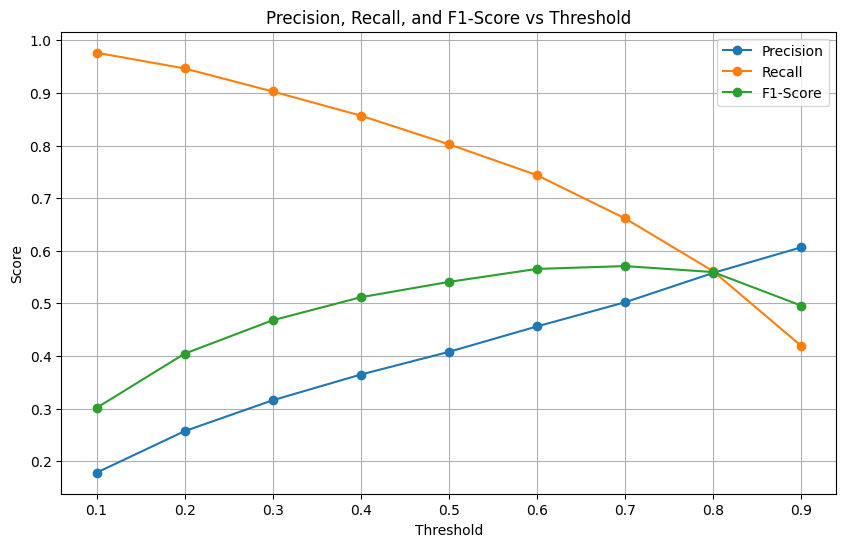

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a range of thresholds
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics
precision_list = []
recall_list = []
f1_list = []

# Iterate over thresholds and calculate metrics
for threshold in thresholds:
    y_val_pred_adjusted = (y_val_proba >= threshold).astype(int)
    precision_list.append(precision_score(y_val, y_val_pred_adjusted))
    recall_list.append(recall_score(y_val, y_val_pred_adjusted))
    f1_list.append(f1_score(y_val, y_val_pred_adjusted))

# Create a DataFrame for easy visualization
metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list
})

# Display metrics for each threshold
print(metrics_df)

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision', marker='o')
plt.plot(thresholds, recall_list, label='Recall', marker='o')
plt.plot(thresholds, f1_list, label='F1-Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

Evaluating Model Performance at a Final Threshold.

In [58]:
chosen_threshold = 0.4
y_val_pred_custom = (y_val_proba >= chosen_threshold).astype(int)

print("Evaluation at Final Threshold:", chosen_threshold)
print(classification_report(y_val, y_val_pred_custom))

log_reg_auc = roc_auc_score(y_val, y_val_proba)
print("AUC-ROC for Logistic Regression (Validation):", log_reg_auc)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_custom))

Evaluation at Final Threshold: 0.4
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      7297
           1       0.36      0.86      0.51       937

    accuracy                           0.81      8234
   macro avg       0.67      0.83      0.70      8234
weighted avg       0.91      0.81      0.84      8234

AUC-ROC for Logistic Regression (Validation): 0.9030361302557197
Confusion Matrix:
 [[5898 1399]
 [ 134  803]]


Evaluating Logistic Regression Model on Test Set at Final Threshold.

In [59]:
# Predict probabilities on the test set
y_test_proba = log_reg.predict_proba(X_test_refined)[:, 1]

# Predict labels using the chosen threshold
y_test_pred_custom = (y_test_proba >= chosen_threshold).astype(int)

# Evaluate the model on the test set
print(f"Evaluation at Threshold {chosen_threshold} (Test Set):")
print(classification_report(y_test, y_test_pred_custom))
print("AUC-ROC Score (Test):", roc_auc_score(y_test, y_test_proba))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_custom))

Evaluation at Threshold 0.4 (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7318
           1       0.36      0.87      0.51       916

    accuracy                           0.82      8234
   macro avg       0.67      0.84      0.70      8234
weighted avg       0.91      0.82      0.85      8234

AUC-ROC Score (Test): 0.912602591444676
Confusion Matrix (Test Set):
 [[5925 1393]
 [ 117  799]]


## 4.2 Random Forest Classifier

Training and Evaluating Random Forest Classifier.

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=None,      # Allow trees to grow fully
    random_state=42,     # For reproducibility
)

# Train the model on SMOTE-balanced training data
rf.fit(X_train_smote, y_train_smote)

# Predict on the validation set
y_val_pred_rf = rf.predict(X_val_scaled)
y_val_proba_rf = rf.predict_proba(X_val_scaled)[:, 1]

# Evaluate performance on validation set
print("Random Forest - Validation Set Evaluation")
print(classification_report(y_val, y_val_pred_rf))
print("AUC-ROC Score (Validation):", roc_auc_score(y_val, y_val_proba_rf))
print("Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred_rf))

Random Forest - Validation Set Evaluation
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7297
           1       0.57      0.56      0.57       937

    accuracy                           0.90      8234
   macro avg       0.76      0.75      0.76      8234
weighted avg       0.90      0.90      0.90      8234

AUC-ROC Score (Validation): 0.9354405671604638
Confusion Matrix (Validation):
 [[6903  394]
 [ 409  528]]


Hyperparameter Optimization for Random Forest Using Bayesian Search.

In [61]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer

# Define the hyperparameter search space
search_space = {
    'n_estimators': (50, 200),  # Range for the number of trees
    'max_depth': (5, 50),       # Numeric upper bound
    'min_samples_split': (2, 20),  # Minimum samples to split a node
    'min_samples_leaf': (1, 10),  # Minimum samples at a leaf node
}

# Initialize Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    scoring='roc_auc',  # Use AUC-ROC as the evaluation metric
    cv=3,  # 3-fold cross-validation
    n_iter=50,  # Number of iterations
    random_state=42,
    n_jobs=-1,  # Utilize all available processors
    verbose=1
)

# Fit the optimization on training data
bayes_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and corresponding score
print("Best Hyperparameters:", bayes_search.best_params_)
print("Best Validation AUC-ROC Score:", bayes_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Evaluating the Best Random Forest Model from Bayesian Optimization.

In [62]:
# Retrieve the best model from BayesSearchCV
rf_best = bayes_search.best_estimator_

# Fit the best model on the SMOTE-balanced training data
rf_best.fit(X_train_smote, y_train_smote)

# Predict on the validation set
y_val_pred = rf_best.predict(X_val_scaled)
y_val_proba = rf_best.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model's performance on the validation set
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Validation Set Evaluation for Best Model:")
print(classification_report(y_val, y_val_pred))
print("AUC-ROC Score (Validation):", roc_auc_score(y_val, y_val_proba))
print("Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))

Validation Set Evaluation for Best Model:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7297
           1       0.58      0.57      0.58       937

    accuracy                           0.90      8234
   macro avg       0.76      0.76      0.76      8234
weighted avg       0.90      0.90      0.90      8234

AUC-ROC Score (Validation): 0.9363565734898729
Confusion Matrix (Validation):
 [[6913  384]
 [ 400  537]]


Analyzing Random Forest Model Performance Across Thresholds.

Metrics for Random Forest:
   Threshold  Precision    Recall  F1-Score
0        0.1   0.348011  0.961580  0.511061
1        0.2   0.428785  0.918890  0.584720
2        0.3   0.486369  0.837780  0.615445
3        0.4   0.525307  0.731057  0.611334
4        0.5   0.579787  0.581644  0.580714
5        0.6   0.653400  0.420491  0.511688
6        0.7   0.673139  0.221985  0.333868
7        0.8   0.763359  0.106724  0.187266
8        0.9   0.870968  0.028815  0.055785


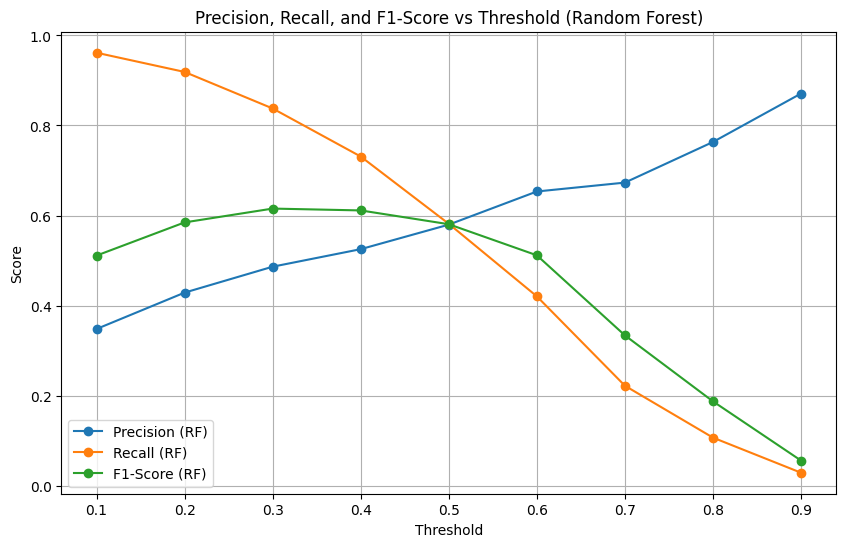

In [63]:
# Define a range of thresholds
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics
precision_list_rf = []
recall_list_rf = []
f1_list_rf = []

y_val_proba_rf_best = rf_best.predict_proba(X_val_scaled)[:, 1]

# Iterate over thresholds and calculate metrics
for threshold in thresholds:
    y_val_pred_rf_threshold = (y_val_proba_rf_best >= threshold).astype(int)
    precision_list_rf.append(precision_score(y_val, y_val_pred_rf_threshold))
    recall_list_rf.append(recall_score(y_val, y_val_pred_rf_threshold))
    f1_list_rf.append(f1_score(y_val, y_val_pred_rf_threshold))

# Create a DataFrame for easy visualization
metrics_df_rf = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_list_rf,
    'Recall': recall_list_rf,
    'F1-Score': f1_list_rf
})

# Display metrics for each threshold
print("Metrics for Random Forest:")
print(metrics_df_rf)

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list_rf, label='Precision (RF)', marker='o')
plt.plot(thresholds, recall_list_rf, label='Recall (RF)', marker='o')
plt.plot(thresholds, f1_list_rf, label='F1-Score (RF)', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs Threshold (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

Final Evaluation of Random Forest Model at Final Threshold.

In [64]:
y_val_proba_rf_best = rf_best.predict_proba(X_val_scaled)[:, 1]

chosen_threshold = 0.3
y_val_pred_final = (y_val_proba_rf_best >= chosen_threshold).astype(int)

print("Evaluation at Final Threshold:", chosen_threshold)
print(classification_report(y_val, y_val_pred_final))

rf_auc = roc_auc_score(y_val, y_val_proba_rf_best)
print("AUC-ROC for Random Forest (Validation):", rf_auc)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_final))

Evaluation at Final Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7297
           1       0.49      0.85      0.62       937

    accuracy                           0.88      8234
   macro avg       0.73      0.87      0.77      8234
weighted avg       0.92      0.88      0.89      8234

AUC-ROC for Random Forest (Validation): 0.9363565734898729
Confusion Matrix:
 [[6455  842]
 [ 143  794]]


Final Evaluation of Random Forest Model on Test Set.

In [65]:
y_test_proba_rf_best = rf_best.predict_proba(X_test_scaled)[:, 1]
y_test_pred_final = (y_test_proba_rf_best >= chosen_threshold).astype(int)

print("Test Set Evaluation at Final Threshold:", chosen_threshold)
print(classification_report(y_test, y_test_pred_final))
print("AUC-ROC Score (Test):", roc_auc_score(y_test, y_test_proba_rf_best))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred_final))

Test Set Evaluation at Final Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7318
           1       0.48      0.83      0.61       916

    accuracy                           0.88      8234
   macro avg       0.73      0.86      0.77      8234
weighted avg       0.92      0.88      0.89      8234

AUC-ROC Score (Test): 0.9373207596033469
Confusion Matrix (Test):
 [[6500  818]
 [ 155  761]]


Analyzing and Visualizing Feature Importance in Random Forest.

Top Features by Importance:
              Feature  Importance
4            duration    0.195460
7   duration_category    0.193239
6       cons.conf.idx    0.097940
3             contact    0.060746
9     total_contacted    0.053248
0                 age    0.048284
42   poutcome_success    0.038498
5            previous    0.036508
8         age_segment    0.035621
1             housing    0.027368


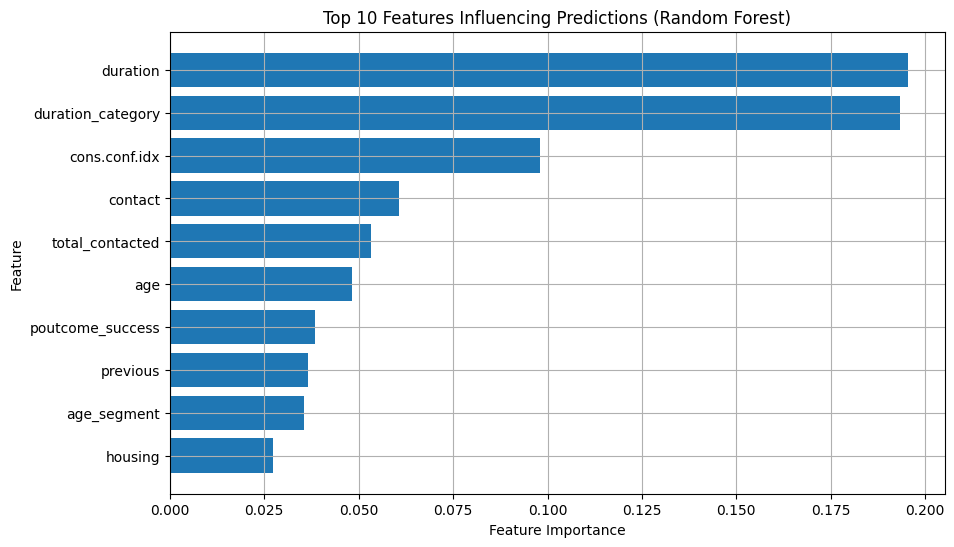

In [66]:
# Extract feature importance from Random Forest model

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top Features by Importance:")
print(feature_importance.head(10))

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features Influencing Predictions (Random Forest)")
plt.gca().invert_yaxis()
plt.grid()
plt.show()